# Smart City Project: Bike's demand market

In the next work the team is going to answer if the city of Paris is provided with the correct supply of bikes.
For it, it is going to be used the open data provided by **Marie de Paris**. This database provides with hourly bike counts per counter, along with the location of counting sites, for the past 13 rolling months, updated as of the previous day.

---

# I. Data exploration

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")

C:\Users\romai\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Read Data

**Bike trafic**

Dataset related to the bike traffic on Paris

In [2]:
smart = pd.read_csv(r'comptage-velo-donnees-compteurs.csv',sep=';', low_memory=False)

* id_compteur: The identifier for the bike counter.
* nom_compteur: Contains the name of the sensor.
* id: Another identifier associated with the location or counter.
* name: The zone of the city where the count is being made.
* sum_counts: The number of bikes detected.
* date: The date and time of the count.
* installation_date: The date the counter was installed.
* url_photos_n1, photos, url_sites: URLs providing photos of the bike passing by and the site of the counter.
* coordinates: The geographical coordinates of the counter.
* counter: A specific code for the counter.
* test_lien_vers_photos_du_site_de_comptage_: A test link to photos from the counting site.
* id_photo_1: An identifier for a specific photo.
* type_dimage: The image type (e.g., jpg).
* mois_annee_comptage: The month and year of the count.

In [3]:
len(smart)

984902

In [4]:
smart.head()

id_compteur                       nom_compteur         id  \
0  100003096-353242251  97 avenue Denfert Rochereau SO-NE  100003096   
1  100003096-353242251  97 avenue Denfert Rochereau SO-NE  100003096   
2  100003096-353242251  97 avenue Denfert Rochereau SO-NE  100003096   
3  100003096-353242251  97 avenue Denfert Rochereau SO-NE  100003096   
4  100003096-353242251  97 avenue Denfert Rochereau SO-NE  100003096   

                          name  sum_counts                       date  \
0  97 avenue Denfert Rochereau           4  2022-12-01T04:00:00+00:00   
1  97 avenue Denfert Rochereau         339  2022-12-01T07:00:00+00:00   
2  97 avenue Denfert Rochereau           1  2022-12-01T03:00:00+00:00   
3  97 avenue Denfert Rochereau         129  2022-12-01T06:00:00+00:00   
4  97 avenue Denfert Rochereau         105  2022-12-01T09:00:00+00:00   

  installation_date                                      url_photos_n1  \
0        2012-02-22  https://filer.eco-counter-tools.com/file/93/e7...   
1        2012-02-22  https://filer.eco-counter-tools.com/file/93/e7...   
2        2012-02-22  https://filer.eco-counter-tools.com/file/93/e7...   
3        2012-02-22  https://filer.eco-counter-tools.com/file/93/e7...   
4        2012-02-22  https://filer.eco-counter-tools.com/file/93/e7...   

         coordinates      counter  \
0  48.83504, 2.33314  Y2H21111072   
1  48.83504, 2.33314  Y2H21111072   
2  48.83504, 2.33314  Y2H21111072   
3  48.83504, 2.33314  Y2H21111072   
4  48.83504, 2.33314  Y2H21111072   

                                              photos  \
0  https://filer.eco-counter-tools.com/file/93/e7...   
1  https://filer.eco-counter-tools.com/file/93/e7...   
2  https://filer.eco-counter-tools.com/file/93/e7...   
3  https://filer.eco-counter-tools.com/file/93/e7...   
4  https://filer.eco-counter-tools.com/file/93/e7...   

          test_lien_vers_photos_du_site_de_comptage_ id_photo_1  \
0  https://filer.eco-counter-tools.com/file/93/e7...     https:   
1  https://filer.eco-counter-tools.com/file/93/e7...     https:   
2  https://filer.eco-counter-tools.com/file/93/e7...     https:   
3  https://filer.eco-counter-tools.com/file/93/e7...     https:   
4  https://filer.eco-counter-tools.com/file/93/e7...     https:   

                                    url_sites type_dimage mois_annee_comptage  
0  https://www.eco-visio.net/Photos/100003096         jpg             2022-12  
1  https://www.eco-visio.net/Photos/100003096         jpg             2022-12  
2  https://www.eco-visio.net/Photos/100003096         jpg             2022-12  
3  https://www.eco-visio.net/Photos/100003096         jpg             2022-12  
4  https://www.eco-visio.net/Photos/100003096         jpg             2022-12

In [5]:
# Display unique values in 'nom_compteur' column
display(smart['nom_compteur'].unique() )

array(['97 avenue Denfert Rochereau SO-NE', '105 rue La Fayette E-O',
       '106 avenue Denfert Rochereau NE-SO', '135 avenue Daumesnil SE-NO',
       '100 rue La Fayette O-E', '28 boulevard Diderot E-O',
       '28 boulevard Diderot O-E', '39 quai François Mauriac NO-SE',
       '39 quai François Mauriac SE-NO',
       "18 quai de l'Hôtel de Ville NO-SE",
       "18 quai de l'Hôtel de Ville SE-NO", '27 boulevard Diderot E-O',
       'Voie Georges Pompidou NE-SO', 'Voie Georges Pompidou SO-NE',
       '67 boulevard Voltaire SE-NO',
       '10 avenue de la Grande Armée SE-NO',
       '7 avenue de la Grande Armée NO-SE', '72 boulevard Voltaire NO-SE',
       '89 boulevard de Magenta NO-SE',
       '16 avenue de la Porte des Ternes E-O', 'Pont du Garigliano NO-SE',
       '102 boulevard de Magenta SE-NO',
       'Face au 16 avenue de la  Porte des Ternes O-E',
       '21 boulevard Auguste Blanqui SO-NE',
       '72 boulevard Richard Lenoir S-N', 'Pont National SO-NE',
       'Face au 48 

In [6]:
# Display unique values in 'name' column
display(smart['name'].unique() )

array(['97 avenue Denfert Rochereau', '105 rue La Fayette',
       '106 avenue Denfert Rochereau', '135 avenue Daumesnil',
       '100 rue La Fayette', '28 boulevard Diderot',
       '39 quai François Mauriac', "18 quai de l'Hôtel de Ville",
       '27 boulevard Diderot', 'Voie Georges Pompidou',
       '67 boulevard Voltaire', '10 avenue de la Grande Armée',
       '7 avenue de la Grande Armée', '72 boulevard Voltaire',
       '89 boulevard de Magenta', '16 avenue de la Porte des Ternes',
       'Pont du Garigliano', '102 boulevard de Magenta',
       'Face au 16 avenue de la  Porte des Ternes',
       '21 boulevard Auguste Blanqui', '72 boulevard Richard Lenoir',
       'Pont National', 'Face au 48 quai de la marne',
       '77 boulevard Richard Lenoir', "Face 104 rue d'Aubervilliers",
       'Face au 70 quai de Bercy', '6 rue Julia Bartet',
       "Face au 25 quai de l'Oise", '35 boulevard de Ménilmontant',
       '152 boulevard du Montparnasse', '10 boulevard Auguste Blanqui',
    

In the data, it can be seen that some zones possess two sensor (by each direction), because some streets are bigger ones and have two way paths.

In [7]:
# Display unique combinations of 'nom_compteur' and 'name', sorted by 'name'
display(smart[['nom_compteur', 'name']].drop_duplicates().sort_values('name'))

nom_compteur                          name
130274  10 avenue de la Grande Armée SE-NO  10 avenue de la Grande Armée
399985  10 boulevard Auguste Blanqui NE-SO  10 boulevard Auguste Blanqui
20025               100 rue La Fayette O-E            100 rue La Fayette
190703      102 boulevard de Magenta SE-NO      102 boulevard de Magenta
10026               105 rue La Fayette E-O            105 rue La Fayette
...                                    ...                           ...
739147    Totem 85 quai d'Austerlitz NO-SE    Totem 85 quai d'Austerlitz
768199            Totem Cours la Reine O-E          Totem Cours la Reine
759427            Totem Cours la Reine E-O          Totem Cours la Reine
110079         Voie Georges Pompidou SO-NE         Voie Georges Pompidou
99998          Voie Georges Pompidou NE-SO         Voie Georges Pompidou

[104 rows x 2 columns]

In [8]:
smart['coordinates'].unique()

array(['48.83504, 2.33314', '48.87773, 2.3506', '48.83507, 2.33305',
       '48.843435, 2.383378', '48.87813, 2.3497', '48.84613, 2.37559',
       '48.83436, 2.377', '48.85372, 2.35702', '48.846099, 2.375456',
       '48.84837, 2.27596', '48.86149, 2.37376', '48.8748, 2.2924',
       '48.87474, 2.29219', '48.86155, 2.37407', '48.87756, 2.35535',
       '48.88156, 2.28122', '48.83994, 2.26692', '48.87769, 2.35475',
       '48.88168, 2.28113', '48.83074, 2.35373', '48.86077, 2.37305',
       '48.82639, 2.38448', '48.89172, 2.38531', '48.860852, 2.372279',
       '48.890457, 2.368852', '48.829523, 2.38699', '48.82624, 2.30281',
       '48.89141, 2.38482', '48.82682, 2.38491', '48.860528, 2.388364',
       '48.83992, 2.26708', '48.84017, 2.33438', '48.83082, 2.35317',
       '48.86179, 2.32014', '48.85735, 2.35211', '48.88926, 2.37472',
       '48.889046, 2.374872', '48.86999, 2.30743', '48.82048, 2.35873',
       '48.84222, 2.30102', '48.82009, 2.3588', '48.86999, 2.30722',
       '48.842

In [9]:
!pip install folium

Now it's projected the map to see in which parts of the city is being placed the sensors.
From what it is shown, the sensors located across main Paris and not the greater Paris.


In [10]:
# Map with sensor locations 

import folium
from folium.plugins import MarkerCluster
import pandas as pd


unique_coordinates = smart['coordinates'].unique()

coordinates_series = pd.Series(unique_coordinates)

mapa = pd.DataFrame()
mapa[['latitude', 'longitude']] = coordinates_series.str.split(',', expand=True)

mapa['latitude'] = mapa['latitude'].astype(float)
mapa['longitude'] = mapa['longitude'].astype(float)

map_center = [mapa['latitude'].iloc[0], mapa['longitude'].iloc[0]]
my_map = folium.Map(location = map_center, zoom_start=12)

marker_cluster = MarkerCluster().add_to(my_map)

for index, row in mapa.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(marker_cluster)

my_map

Now we are going to check on the span of data that the database possess.
Which we can see that the data is refreshed until the day that this book is being redacted. The history of the data we have is of about two years more less (first date of record: march 2022).

In [11]:
# Convert the 'date' column to datetime format
smart['main_date'] = pd.to_datetime(smart['date'])

# Create a DataFrame with sorted unique dates
fechas = pd.DataFrame(sorted(smart['main_date'].dt.date.unique()))
fechas

0
0    2022-03-27
1    2022-04-05
2    2022-06-23
3    2022-07-10
4    2022-08-03
..          ...
422  2024-01-22
423  2024-01-23
424  2024-01-24
425  2024-01-25
426  2024-01-26

[427 rows x 1 columns]

Here are the dates in which the sensors have been implemented on the roads.
Where we can see that this dataset has been working on it since 2012.
There are some sensors that where recently installed the last year.

In [12]:
# Sort and display unique installation dates
smart['installation_date'].sort_values().unique()

array(['2012-02-13', '2012-02-22', '2013-01-17', '2013-01-18',
       '2013-01-19', '2017-07-12', '2017-12-15', '2018-06-27',
       '2018-07-27', '2018-11-28', '2018-11-29', '2018-11-30',
       '2018-12-01', '2018-12-05', '2018-12-06', '2018-12-07',
       '2018-12-13', '2019-09-04', '2019-10-30', '2019-11-01',
       '2019-11-05', '2019-11-06', '2019-11-07', '2019-11-08',
       '2019-11-13', '2019-11-14', '2019-12-10', '2019-12-11',
       '2019-12-12', '2020-02-11', '2020-02-18', '2020-05-20',
       '2020-07-22', '2020-11-18', '2021-05-18', '2021-11-30',
       '2023-01-24', '2023-01-25', '2023-01-26', '2023-01-31',
       '2023-02-01', '2023-02-02'], dtype=object)

In [13]:
# Displaying sensor information for a specific installation date
display(smart[smart['installation_date'] == '2023-02-02'][['name', 'installation_date','nom_compteur']].drop_duplicates().sort_values('name'))

name installation_date  \
887743          51 boulevard du Général Martial Valin        2023-02-02   
973939  Face au 49 boulevard du Général Martial Valin        2023-02-02   

                                             nom_compteur  
887743        51 boulevard du Général Martial Valin SE-NO  
973939  Face au 49 boulevard du Général Martial Valin ...

In [14]:
# Filter the DataFrame for a specific installation date
smart[smart['installation_date']=='2023-02-02']

id_compteur  \
887743  300030279-353356112   
887746  300030279-353356112   
887749  300030279-353356112   
887752  300030279-353356112   
887755  300030279-353356112   
...                     ...   
984897  300030271-353356061   
984898  300030271-353356061   
984899  300030271-353356061   
984900  300030271-353356061   
984901  300030271-353356061   

                                             nom_compteur         id  \
887743        51 boulevard du Général Martial Valin SE-NO  300030279   
887746        51 boulevard du Général Martial Valin SE-NO  300030279   
887749        51 boulevard du Général Martial Valin SE-NO  300030279   
887752        51 boulevard du Général Martial Valin SE-NO  300030279   
887755        51 boulevard du Général Martial Valin SE-NO  300030279   
...                                                   ...        ...   
984897  Face au 49 boulevard du Général Martial Valin ...  300030271   
984898  Face au 49 boulevard du Général Martial Valin ...  300030271   
984899  Face au 49 boulevard du Général Martial Valin ...  300030271   
984900  Face au 49 boulevard du Général Martial Valin ...  300030271   
984901  Face au 49 boulevard du Général Martial Valin ...  300030271   

                                                 name  sum_counts  \
887743          51 boulevard du Général Martial Valin          69   
887746          51 boulevard du Général Martial Valin         113   
887749          51 boulevard du Général Martial Valin          59   
887752          51 boulevard du Général Martial Valin          31   
887755          51 boulevard du Général Martial Valin          10   
...                                               ...         ...   
984897  Face au 49 boulevard du Général Martial Valin          19   
984898  Face au 49 boulevard du Général Martial Valin         110   
984899  Face au 49 boulevard du Général Martial Valin         116   
984900  Face au 49 boulevard du Général Martial Valin          29   
984901  Face au 49 boulevard du Général Martial Valin          10   

                             date installation_date  \
887743  2023-02-02T15:00:00+00:00        2023-02-02   
887746  2023-02-02T16:00:00+00:00        2023-02-02   
887749  2023-02-02T19:00:00+00:00        2023-02-02   
887752  2023-02-02T21:00:00+00:00        2023-02-02   
887755  2023-02-02T23:00:00+00:00        2023-02-02   
...                           ...               ...   
984897  2024-01-26T21:00:00+00:00        2023-02-02   
984898  2024-01-26T17:00:00+00:00        2023-02-02   
984899  2024-01-26T18:00:00+00:00        2023-02-02   
984900  2024-01-26T20:00:00+00:00        2023-02-02   
984901  2024-01-26T22:00:00+00:00        2023-02-02   

                                            url_photos_n1  \
887743  https://filer.eco-counter-tools.com/file/a5/d4...   
887746  https://filer.eco-counter-tools.com/file/a5/d4...   
887749  https://filer.eco-counter-tools.com/file/a5/d4...   
887752  https://filer.eco-counter-tools.com/file/a5/d4...   
887755  https://filer.eco-counter-tools.com/file/a5/d4...   
...                                                   ...   
984897  https://filer.eco-counter-tools.com/file/c4/ff...   
984898  https://filer.eco-counter-tools.com/file/c4/ff...   
984899  https://filer.eco-counter-tools.com/file/c4/ff...   
984900  https://filer.eco-counter-tools.com/file/c4/ff...   
984901  https://filer.eco-counter-tools.com/file/c4/ff...   

                coordinates      counter  \
887743  48.837006, 2.274824  Y2H22115089   
887746  48.837006, 2.274824  Y2H22115089   
887749  48.837006, 2.274824  Y2H22115089   
887752  48.837006, 2.274824  Y2H22115089   
887755  48.837006, 2.274824  Y2H22115089   
...                     ...          ...   
984897  48.837055, 2.274019  Y2H22115088   
984898  48.837055, 2.274019  Y2H22115088   
984899  48.837055, 2.274019  Y2H22115088   
984900  48.837055, 2.274019  Y2H22115088   
984901  48.837055, 2.274019  Y2H22115088   

                          

**Climate**

Now we are importing the data about the climatic data of the Paris city in 2023. Some of the features that
is going to be keep are the next one:


* NUM_POSTE   : Météo-France station number with 8 digits
* NOM_USUEL   : Usual name of the station
* LAT         : Latitude, negative in the south (in degrees and millionths of a degree)
* LON         : Longitude, negative to the west of GREENWICH (in degrees and millionths of a degree)
* AAAAMMJJHH  : Date of the measurement (year month day hour)
* RR          : Quantity of precipitation fallen in 1 hour (in mm and 1/10 mm)
* TM          : Instantaneous temperature under shelter (in °C and 1/10) 

In [15]:
meteo = pd.read_csv(r'Q_75_latest-2023-2024_RR-T-Vent.csv',sep=';', low_memory=False)
meteo.head(2)

NUM_POSTE   NOM_USUEL        LAT       LON  ALTI  AAAAMMJJ   RR  QRR    TN  \
0   75106001  LUXEMBOURG  48.844667  2.333833    46  20230101  4.6  1.0  11.7   
1   75106001  LUXEMBOURG  48.844667  2.333833    46  20230102  1.4  1.0  10.0   

   QTN  ...  DXI2  QDXI2  HXI2  QHXI2  FXI3S  QFXI3S  DXI3S  QDXI3S  HXI3S  \
0  1.0  ...   NaN    NaN   NaN    NaN    NaN     NaN    NaN     NaN    NaN   
1  1.0  ...   NaN    NaN   NaN    NaN    NaN     NaN    NaN     NaN    NaN   

   QHXI3S  
0     NaN  
1     NaN  

[2 rows x 56 columns]

In [16]:
meteo2 = meteo[[
'NUM_POSTE','NOM_USUEL','LAT','LON','AAAAMMJJ','RR','TM'
]]

In [17]:
meteo2['AAAAMMJJ'] = pd.to_datetime(meteo2['AAAAMMJJ'], format='%Y%m%d')

In [18]:
import folium
from folium.plugins import TimestampedGeoJson
import pandas as pd

# Drop duplicate rows based on latitude and longitude
unique_locations = meteo2[['LAT', 'LON']].drop_duplicates()

# Convert 'AAAAMMJJ' column to string format 
meteo2['AAAAMMJJ_str'] = meteo2['AAAAMMJJ'].dt.strftime('%Y-%m-%d')

# Create a base map
m = folium.Map(location=[48.8566, 2.3522], zoom_start=5)

# Create a GeoJson object with Timestamped data for unique locations
features = []
for index, row in unique_locations.iterrows():
    related_data = meteo2[(meteo2['LAT'] == row['LAT']) & (meteo2['LON'] == row['LON'])].iloc[0]

    feature = {
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [row['LON'], row['LAT']]
        },
        'properties': {
            'time': related_data['AAAAMMJJ_str'],
            'popup': f"{related_data['NOM_USUEL']} - {related_data['RR']} mm - {related_data['TM']}",
            'style': {'radius': related_data['TM'], 'fillColor': 'red', 'color': 'red', 'fillOpacity': 0.6}
        }
    }
    features.append(feature)

TimestampedGeoJson({'type': 'FeatureCollection', 'features': features},
                    period='P1D', 
                    duration='P1D',
                    auto_play=True).add_to(m)

m
# m.save('meteo_map_with_timelapse.html')

Since the principal data, related to the bike traffic is only going to be based on the 2023, this dataset is also going to cutted:

In [19]:
meteo2=meteo2[meteo2['AAAAMMJJ']< '2024-01-01']

Some blanks are recognized in the data. The average of the temperature of the year is going to be imputed.

In [20]:
meteo2.isnull().sum()

NUM_POSTE         0
NOM_USUEL         0
LAT               0
LON               0
AAAAMMJJ          0
RR              730
TM               62
AAAAMMJJ_str      0
dtype: int64

In [21]:
rr_average = meteo2['RR'].mean()
tm_average = meteo2['TM'].mean()

meteo2['RR'].fillna(rr_average, inplace=True)
meteo2['TM'].fillna(tm_average, inplace=True)

**Supply of bikes in the city (Velib)**

The next dataset contains the actual position of the bike dock stations of the service Velib. In here it is the data of one day of the usage of the bikes of this organization:

        Identifiant station: Station Identifier
        Nom station: Station Name
        Station en fonctionnement: Station in Operation
        Capacité de la station: Station Capacity
        Nombre bornettes libres: Number of Available Docking Points
        Nombre total vélos disponibles: Total Number of Available Bicycles
        Vélos mécaniques disponibles: Mechanical Bicycles Available
        Vélos électriques disponibles: Electric Bicycles Available
        Borne de paiement disponible: Available Payment Terminal
        Retour Vélib possible: Vélib Return Possible
        Actualisation de la donnée: Data Update
        Coordonnées géographiques: Geographic Coordinates
        Nom communes équipées: Equipped Municipalities Name
        Code INSEE communes équipées: INSEE Code of Equipped Municipalities

In [22]:
velib = pd.read_csv(r'velib-disponibilite-en-temps-reel.csv',sep=';', low_memory=False)
velib.head(2)

Identifiant station                    Nom station  \
0               31104      Mairie de Rosny-sous-Bois   
1               16107  Benjamin Godard - Victor Hugo   

  Station en fonctionnement  Capacité de la station  Nombre bornettes libres  \
0                       OUI                      30                       27   
1                       OUI                      35                       31   

   Nombre total vélos disponibles  Vélos mécaniques disponibles  \
0                               2                             0   
1                               4                             2   

   Vélos électriques disponibles Borne de paiement disponible  \
0                              2                          OUI   
1                              2                          OUI   

  Retour vélib possible Actualisation de la donnée  \
0                   OUI  2024-01-29T18:47:09+01:00   
1                   OUI  2024-01-29T18:45:03+01:00   

          Coordonnées géographiques Nom communes équipées  \
0  48.871256519012, 2.4865807592869       Rosny-sous-Bois   
1               48.865983, 2.275725                 Paris   

   Code INSEE communes équipées  
0                           NaN  
1                           NaN

The data is only going to be directed to the central Paris zone

In [23]:
velib['Nom communes équipées'].unique()

array(['Rosny-sous-Bois', 'Paris', 'Vitry-sur-Seine', 'Saint-Denis',
       'Aubervilliers', 'Ivry-sur-Seine', 'Rueil-Malmaison',
       'Nogent-sur-Marne', 'Bobigny', 'Boulogne-Billancourt', 'Montreuil',
       'Issy-les-Moulineaux', 'Vincennes', 'Montrouge', 'Bagneux',
       'Nanterre', 'Villejuif', 'Malakoff', 'Bagnolet',
       'Asnières-sur-Seine', 'Pantin', 'Joinville-le-Pont',
       'Champigny-sur-Marne', 'Choisy-le-Roi', 'Le Pré-Saint-Gervais',
       'Le Kremlin-Bicêtre', 'Fontenay-sous-Bois', 'Alfortville',
       'Les Lilas', 'Saint-Mandé', 'Neuilly-sur-Seine', 'Courbevoie',
       'Romainville', 'Vanves', 'Cachan', 'Clichy', 'Arcueil', 'Gentilly',
       'Levallois-Perret', 'Puteaux', 'La Garenne-Colombes',
       'Charenton-le-Pont', 'Suresnes', 'Colombes', 'Chaville',
       'Saint-Ouen-sur-Seine', 'Argenteuil', 'Saint-Cloud',
       'Saint-Maurice', 'Maisons-Alfort', 'Bourg-la-Reine', 'Sceaux',
       'Villeneuve-la-Garenne', 'Meudon', 'Sèvres', 'Fontenay-aux-Roses',
 

In [24]:
velib = velib[velib['Nom communes équipées']=='Paris']

In [25]:
velib = velib[['Identifiant station','Nom station','Station en fonctionnement','Capacité de la station','Coordonnées géographiques','Nom communes équipées']]

Since we are only checking on the theorical supply of the bikes by the ´Marie de Paris´ we only keep the unique values

In [26]:
velib = velib.drop_duplicates()

In [27]:
velib[velib['Station en fonctionnement']=='OUI']

Identifiant station                        Nom station  \
1                  16107      Benjamin Godard - Victor Hugo   
2                   9020                 Toudouze - Clauzel   
4                  12109                    Mairie du 12ème   
5                  14111        Cassini - Denfert-Rochereau   
6                  14014           Jourdan - Stade Charléty   
...                  ...                                ...   
1457               11046  Place de la République - Voltaire   
1458                4010              Saint-Antoine Sévigné   
1459                8002  Gare Saint-Lazare - Cour du Havre   
1460               15122               Place Charles Vallin   
1461               12107           Diderot - Pierre Bourdan   

     Station en fonctionnement  Capacité de la station  \
1                          OUI                      35   
2                          OUI                      21   
4                          OUI                      30   
5                          OUI                      25   
6                          OUI                      60   
...                        ...                     ...   
1457                       OUI                      19   
1458                       OUI                      26   
1459                       OUI                      45   
1460                       OUI                      26   
1461                       OUI                      21   

                  Coordonnées géographiques Nom communes équipées  
1                       48.865983, 2.275725                 Paris  
2     48.87929591733507, 2.3373600840568547                 Paris  
4          48.840855311763, 2.3875549435616                 Paris  
5          48.837525839067, 2.3360354080796                 Paris  
6          48.819428333369, 2.3433353751898                 Paris  
...                                     ...                   ...  
1457       48.866830968942, 2.3654810339212                 Paris  
1458                  48.8550222, 2.3612322                 Paris  
1459       48.875674400851, 2.3265598341823                 Paris  
1460       48.835523812041, 2.3025986552238                 Paris  
1461       48.847648620797, 2.3902582749724                 Paris  

[989 rows x 6 columns]

In [28]:
import folium
import pandas as pd

# Extract coordinates from 'Coordonnées géographiques' column
velib[['Latitude', 'Longitude']] = velib['Coordonnées géographiques'].str.split(', ', expand=True)

# Convert coordinates to float
velib['Latitude'] = velib['Latitude'].astype(float)
velib['Longitude'] = velib['Longitude'].astype(float)

# Create a map centered at the mean of all coordinates
m = folium.Map(location=[velib['Latitude'].mean(), velib['Longitude'].mean()], zoom_start=12)

for index, row in velib.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Nom station']} - {row['Capacité de la station']} bikes capacity",
        icon=folium.Icon(color='red')
    ).add_to(m)
    
m

#m.save('map_with_stations.html')

In [29]:
!pip install geopandas

---

# II. Data Featuring

---

Now in this section there is going to be developed some additional work related to create features that can be on relevance to the main topic.
And also, clean the data and prepare it in order to apply some modeling.

**Date fields**

Now it is provided a formula to create several fields related to the time as hour, minute, day, and more. Which can help us on some regression or
some timeline issue

In [30]:
# Convert 'main_date' to datetime format
smart['main_date'] = pd.to_datetime(smart['main_date'])

# Set 'main_date' as the index
smart.set_index('main_date', inplace=True)

In [31]:
def add_datepart(df, fldnames, drop=True, time=False, errors="raise"):
    import re
    import math

    if isinstance(fldnames,str):
        fldnames = [fldnames]
    for fldname in fldnames:
        fld = df[fldname] 
        fld_dtype = fld.dtype
        if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
            fld_dtype = np.datetime64

        if not np.issubdtype(fld_dtype, np.datetime64):
            df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True, errors=errors)
        targ_pre = re.sub('[Dd]ate$', '', fldname)
        attr = ['Year', 'Month', 'Week','Date', 'Day', 'Dayofweek', 'Dayofyear',
                'Is_month_end', 'Is_month_start']
        if time: attr = attr + ['Hour', 'Minute', 'Second']
        for n in attr:
            if n =='Week':
                df[ n] = getattr(fld.dt.isocalendar(),'week')
            else:
                df[ n] = getattr(fld.dt, n.lower())
        df[ 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
        if drop: df.drop(fldname, axis=1, inplace=True)

In [32]:
add_datepart(smart, 'date',time=True)

In [33]:
smart.tail()

id_compteur  \
main_date                                        
2024-01-26 21:00:00+00:00  300030271-353356061   
2024-01-26 17:00:00+00:00  300030271-353356061   
2024-01-26 18:00:00+00:00  300030271-353356061   
2024-01-26 20:00:00+00:00  300030271-353356061   
2024-01-26 22:00:00+00:00  300030271-353356061   

                                                                nom_compteur  \
main_date                                                                      
2024-01-26 21:00:00+00:00  Face au 49 boulevard du Général Martial Valin ...   
2024-01-26 17:00:00+00:00  Face au 49 boulevard du Général Martial Valin ...   
2024-01-26 18:00:00+00:00  Face au 49 boulevard du Général Martial Valin ...   
2024-01-26 20:00:00+00:00  Face au 49 boulevard du Général Martial Valin ...   
2024-01-26 22:00:00+00:00  Face au 49 boulevard du Général Martial Valin ...   

                                  id  \
main_date                              
2024-01-26 21:00:00+00:00  300030271   
2024-01-26 17:00:00+00:00  300030271   
2024-01-26 18:00:00+00:00  300030271   
2024-01-26 20:00:00+00:00  300030271   
2024-01-26 22:00:00+00:00  300030271   

                                                                    name  \
main_date                                                                  
2024-01-26 21:00:00+00:00  Face au 49 boulevard du Général Martial Valin   
2024-01-26 17:00:00+00:00  Face au 49 boulevard du Général Martial Valin   
2024-01-26 18:00:00+00:00  Face au 49 boulevard du Général Martial Valin   
2024-01-26 20:00:00+00:00  Face au 49 boulevard du Général Martial Valin   
2024-01-26 22:00:00+00:00  Face au 49 boulevard du Général Martial Valin   

                           sum_counts installation_date  \
main_date                                                 
2024-01-26 21:00:00+00:00          19        2023-02-02   
2024-01-26 17:00:00+00:00         110        2023-02-02   
2024-01-26 18:00:00+00:00         116        2023-02-02   
2024-01-26 20:00:00+00:00          29        2023-02-02   
2024-01-26 22:00:00+00:00          10        2023-02-02   

                                                               url_photos_n1  \
main_date                                                                      
2024-01-26 21:00:00+00:00  https://filer.eco-counter-tools.com/file/c4/ff...   
2024-01-26 17:00:00+00:00  https://filer.eco-counter-tools.com/file/c4/ff...   
2024-01-26 18:00:00+00:00  https://filer.eco-counter-tools.com/file/c4/ff...   
2024-01-26 20:00:00+00:00  https://filer.eco-counter-tools.com/file/c4/ff...   
2024-01-26 22:00:00+00:00  https://filer.eco-counter-tools.com/file/c4/ff...   

                                   coordinates      counter  \
main_date                                                     
2024-01-26 21:00:00+00:00  48.837055, 2.274019  Y2H22115088   
2024-01-26 17:00:00+00:00  48.837055, 2.274019  Y2H22115088   
2024-01-26 18:00:00+00:00  48.837055, 2.274019  Y2H22115088   
2024-01-26 20:00:00+00:00  48.837055, 2.274019  Y2H22115088   
2024-01-26 22:00:00+00:00  48.837055, 2.274019  Y2H22115088   

                                                                      photos  \
main_date                                                                      
2024-01-26 21:00:00+00:00  https://filer.eco-counter-tools.com/file/c4/ff...   
2024-01-26 17:00:00+00:00  https://filer.eco-counter-tools.com/file/c4/ff...   
2024-01-26 18:00:00+00:00  https://filer.eco-counter-tools.com/file/c4/ff...   
2024-01-26 20:00:00+00:00  https://filer.eco-counter-tools.com/file/c4/ff...   
2024-01-26 22:00:00+00:00  https://filer.eco-counter-tools.com/file/c4/ff...   

                           ...        Date Day Dayofweek Dayofyear  \
main_date                  ...                                       
2024-01-26 21:00:00+00:00  ...  2024-01-26  26         4        26   
2024-01-26 17:00:00+00:00  ...  2024-01-26  26         4        26   
2024-01-26 18:00:00+00:00  ...  2024-01-26  26     

**Data span**

For the scope of this work, the data needs to provide some balanced data on case of the samples taken from the street.

For it the data scope is going to comprenhend:
* Only complete months, which means not take in account the month that the book is currently being worked (january) and also not take february and march. Since the catch of the data has started to be collected from april 2022. This could only provide of only one year of data on this months in comparison with the other months that will have 2 years of history.
* Also, the sensors that have been implemented on the last year (2023) are not going to be taken since this points will not have history of about 2 years

**Clean of fields**

Some fields of the database are not of importance to the calculations.
The next ones:
* metada images: this fields provide of data about photos. Which are not going to be used in the book: url_photos_n1,test_lien_vers_photos_du_site_de_comptage_,url_sites,type_dimage

* index : id is the field which is used as an index,installation date

In [34]:
smart2 = smart.copy()

In [35]:
smart2.iloc[1]

id_compteur                                                                 100003096-353242251
nom_compteur                                                  97 avenue Denfert Rochereau SO-NE
id                                                                                    100003096
name                                                                97 avenue Denfert Rochereau
sum_counts                                                                                  339
installation_date                                                                    2012-02-22
url_photos_n1                                 https://filer.eco-counter-tools.com/file/93/e7...
coordinates                                                                   48.83504, 2.33314
counter                                                                             Y2H21111072
photos                                        https://filer.eco-counter-tools.com/file/93/e7...
test_lien_vers_photos_du_site_de_comptag

In [36]:
# Filtering by Installation Date and Month
#smart2 = smart2[smart2['installation_date']< '2023-01-01']
#smart2 = smart2[~smart2['Month'].isin([1, 2, 3])]

In [37]:
# Remove columns
smart2.drop(columns=['id_compteur','id','installation_date','photos',
                      'url_photos_n1','test_lien_vers_photos_du_site_de_comptage_',
                      'id_photo_1','url_sites','type_dimage','Elapsed','Second','Minute'], inplace=True)

In [38]:
smart_3 = smart2.copy()

In [39]:
smart_3 = smart_3[smart_3["Year"]==2023]

In [40]:
smart_3.tail()

nom_compteur  \
main_date                                                                      
2023-12-31 18:00:00+00:00  Face au 49 boulevard du Général Martial Valin ...   
2023-12-31 15:00:00+00:00  Face au 49 boulevard du Général Martial Valin ...   
2023-12-31 19:00:00+00:00  Face au 49 boulevard du Général Martial Valin ...   
2023-12-31 22:00:00+00:00  Face au 49 boulevard du Général Martial Valin ...   
2023-12-31 23:00:00+00:00  Face au 49 boulevard du Général Martial Valin ...   

                                                                    name  \
main_date                                                                  
2023-12-31 18:00:00+00:00  Face au 49 boulevard du Général Martial Valin   
2023-12-31 15:00:00+00:00  Face au 49 boulevard du Général Martial Valin   
2023-12-31 19:00:00+00:00  Face au 49 boulevard du Général Martial Valin   
2023-12-31 22:00:00+00:00  Face au 49 boulevard du Général Martial Valin   
2023-12-31 23:00:00+00:00  Face au 49 boulevard du Général Martial Valin   

                           sum_counts          coordinates      counter  \
main_date                                                                 
2023-12-31 18:00:00+00:00          24  48.837055, 2.274019  Y2H22115088   
2023-12-31 15:00:00+00:00          25  48.837055, 2.274019  Y2H22115088   
2023-12-31 19:00:00+00:00          13  48.837055, 2.274019  Y2H22115088   
2023-12-31 22:00:00+00:00          12  48.837055, 2.274019  Y2H22115088   
2023-12-31 23:00:00+00:00           8  48.837055, 2.274019  Y2H22115088   

                          mois_annee_comptage  Year  Month  Week        Date  \
main_date                                                                      
2023-12-31 18:00:00+00:00             2023-12  2023     12    52  2023-12-31   
2023-12-31 15:00:00+00:00             2023-12  2023     12    52  2023-12-31   
2023-12-31 19:00:00+00:00             2023-12  2023     12    52  2023-12-31   
2023-12-31 22:00:00+00:00             2023-12  2023     12    52  2023-12-31   
2023-12-31 23:00:00+00:00             2024-01  2023     12    52  2023-12-31   

                           Day  Dayofweek  Dayofyear  Is_month_end  \
main_date                                                            
2023-12-31 18:00:00+00:00   31          6        365          True   
2023-12-31 15:00:00+00:00   31          6        365          True   
2023-12-31 19:00:00+00:00   31          6        365          True   
2023-12-31 22:00:00+00:00   31          6        365          True   
2023-12-31 23:00:00+00:00   31          6        365          True   

                           Is_month_start  Hour  
main_date                                        
2023-12-31 18:00:00+00:00           False    18  
2023-12-31 15:00:00+00:00           False    15  
2023-12-31 19:00:00+00:00           False    19  
2023-12-31 22:00:00+00:00           False    22  
2023-12-31 23:00:00+00:00           False    23

One feature that can also be implemented is about the seasonality. The usage of bikes are also related also climatic configurations. For it, the field **season** is going to be created.

In [41]:
# Define a Function to Determine the Season

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Unknown'

In [42]:
smart_3['Season'] = smart_3['Month'].apply(get_season)

In [43]:
# Check for Any 'Unknown' Seasons
smart_3[smart_3['Season']=='Unknown']

Empty DataFrame
Columns: [nom_compteur, name, sum_counts, coordinates, counter, mois_annee_comptage, Year, Month, Week, Date, Day, Dayofweek, Dayofyear, Is_month_end, Is_month_start, Hour, Season]
Index: []

**Data distribution**

In [44]:
smart_3.dtypes

nom_compteur           object
name                   object
sum_counts              int64
coordinates            object
counter                object
mois_annee_comptage    object
Year                    int32
Month                   int32
Week                   UInt32
Date                   object
Day                     int32
Dayofweek               int32
Dayofyear               int32
Is_month_end             bool
Is_month_start           bool
Hour                    int32
Season                 object
dtype: object

In [45]:
# Filter Data for Specific Year and Months
#smart2[smart2['Year'] == 2022 & smart2['Month'].isin([5,6,7,8])]
#smart2[(smart2['Year'] == 2022) & (smart2['Month'].isin([5, 6, 7, 8]))]

**Standarization and joining of the data**

Now that we have the next information:

        + bike demand
        + theorical supply
        + weather forecast

With the arrondisments data , we are going to chain all the data in a standar geographical point being the areas of Paris.

**Arrondisiments**

It is being imported the open data related to the polygons of the arrodissements of Paris in order to put a common value with all the databases of traffic, weather and supply of bikes

In [46]:
paris_arrondissements = pd.read_csv('arrondissements.csv', delimiter=';') 

In [47]:
paris_arrondissements[paris_arrondissements['Nom de l’arrondissement']=='1er Ardt']

Identifiant séquentiel de l’arrondissement  Numéro d’arrondissement  \
0                                   750000001                        1   

   Numéro d’arrondissement INSEE Nom de l’arrondissement  \
0                          75101                1er Ardt   

  Nom officiel de l’arrondissement    N_SQ_CO       Surface    Périmètre  \
0                           Louvre  750001537  1.824613e+06  6054.936862   

                            Geometry X Y  \
0  48.86256270183607, 2.3364433620533878   

                                            Geometry  
0  {"coordinates": [[[2.328007329038849, 48.86991...

**Creating the geospatial data for each dataset** 


`Arrondsiments`

In [48]:
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import shape
paris_arrondissements['Geometry'] = paris_arrondissements['Geometry'].apply(lambda x: shape(eval(x)))
paris_arrondissements_gp = gpd.GeoDataFrame(paris_arrondissements, geometry='Geometry')
paris_arrondissements_gp['Geometry'] = paris_arrondissements_gp['Geometry'].apply(lambda geom: geom.simplify(tolerance=1e-5))
paris_arrondissements_gp.crs = "EPSG:4326"

In [49]:
from shapely.geometry import Polygon


paris_arrondissements_gp['Geometry'] = paris_arrondissements_gp['Geometry'].apply(lambda geom: Polygon([(y, x) for x, y in geom.exterior.coords]))


paris_arrondissements_gp[['Y', 'X']] = paris_arrondissements_gp['Geometry X Y'].str.split(', ', expand=True)
paris_arrondissements_gp['Geometry X Y'] = paris_arrondissements_gp.apply(lambda row: f"{row['X']}, {row['Y']}", axis=1)


In [50]:
paris_arrondissements_gp.head(1)

Identifiant séquentiel de l’arrondissement  Numéro d’arrondissement  \
0                                   750000001                        1   

   Numéro d’arrondissement INSEE Nom de l’arrondissement  \
0                          75101                1er Ardt   

  Nom officiel de l’arrondissement    N_SQ_CO       Surface    Périmètre  \
0                           Louvre  750001537  1.824613e+06  6054.936862   

                            Geometry X Y  \
0  2.3364433620533878, 48.86256270183607   

                                            Geometry                  Y  \
0  POLYGON ((48.86992 2.32801, 48.86851 2.32997, ...  48.86256270183607   

                    X  
0  2.3364433620533878

`bike demand`

In [51]:
from shapely.geometry import Point
smart_3['geometry'] = smart_3['coordinates'].apply(lambda coord: Point(map(float, coord.split(', '))))
smart_3['geometry'] = smart_3['geometry'].apply(lambda geom: geom.simplify(tolerance=1e-5))

In [52]:
smart_gp = gpd.GeoDataFrame(smart_3, geometry=smart_3['geometry'], crs="EPSG:4326")

**Arrondisiment-->bike demand**

In [53]:
smart_gp['arrondissement'] = smart_gp.geometry.apply(
    lambda point: next(
        (row['Numéro d’arrondissement'] for _, row in paris_arrondissements_gp.iterrows() if point.within(row['Geometry'])),
        None
    )
)
smart_gp.head(7)

nom_compteur  \
main_date                                                      
2023-01-01 01:00:00+00:00  97 avenue Denfert Rochereau SO-NE   
2023-01-01 04:00:00+00:00  97 avenue Denfert Rochereau SO-NE   
2023-01-01 05:00:00+00:00  97 avenue Denfert Rochereau SO-NE   
2023-01-01 06:00:00+00:00  97 avenue Denfert Rochereau SO-NE   
2023-01-01 10:00:00+00:00  97 avenue Denfert Rochereau SO-NE   
2023-01-01 12:00:00+00:00  97 avenue Denfert Rochereau SO-NE   
2023-01-01 16:00:00+00:00  97 avenue Denfert Rochereau SO-NE   

                                                  name  sum_counts  \
main_date                                                            
2023-01-01 01:00:00+00:00  97 avenue Denfert Rochereau          16   
2023-01-01 04:00:00+00:00  97 avenue Denfert Rochereau          14   
2023-01-01 05:00:00+00:00  97 avenue Denfert Rochereau           0   
2023-01-01 06:00:00+00:00  97 avenue Denfert Rochereau           4   
2023-01-01 10:00:00+00:00  97 avenue Denfert Rochereau          31   
2023-01-01 12:00:00+00:00  97 avenue Denfert Rochereau          28   
2023-01-01 16:00:00+00:00  97 avenue Denfert Rochereau          30   

                                 coordinates      counter mois_annee_comptage  \
main_date                                                                       
2023-01-01 01:00:00+00:00  48.83504, 2.33314  Y2H21111072             2023-01   
2023-01-01 04:00:00+00:00  48.83504, 2.33314  Y2H21111072             2023-01   
2023-01-01 05:00:00+00:00  48.83504, 2.33314  Y2H21111072             2023-01   
2023-01-01 06:00:00+00:00  48.83504, 2.33314  Y2H21111072             2023-01   
2023-01-01 10:00:00+00:00  48.83504, 2.33314  Y2H21111072             2023-01   
2023-01-01 12:00:00+00:00  48.83504, 2.33314  Y2H21111072             2023-01   
2023-01-01 16:00:00+00:00  48.83504, 2.33314  Y2H21111072             2023-01   

                           Year  Month  Week        Date  Day  Dayofweek  \
main_date                                                                  
2023-01-01 01:00:00+00:00  2023      1    52  2023-01-01    1          6   
2023-01-01 04:00:00+00:00  2023      1    52  2023-01-01    1          6   
2023-01-01 05:00:00+00:00  2023      1    52  2023-01-01    1          6   
2023-01-01 06:00:00+00:00  2023      1    52  2023-01-01    1          6   
2023-01-01 10:00:00+00:00  2023      1    52  2023-01-01    1          6   
2023-01-01 12:00:00+00:00  2023      1    52  2023-01-01    1          6   
2023-01-01 16:00:00+00:00  2023      1    52  2023-01-01    1          6   

                           Dayofyear  Is_month_end  Is_month_start  Hour  \
main_date                                                                  
2023-01-01 01:00:00+00:00          1         False            True     1   
2023-01-01 04:00:00+00:00          1         False            True     4   
2023-01-01 05:00:00+00:00          1         False            True     5   
2023-01-01 06:00:00+00:00          1         False            True     6   
2023-01-01 10:00:00+00:00          1         False            True    10   
2023-01-01 12:00:00+00:00          1         False            True    12   
2023-01-01 16:00:00+00:00          1         False            True    16   

                           Season                  geometry  arrondissement  
main_date                                                                    
2023-01-01 01:00:00+00:00  Winter  POINT (48.83504 2.33314)            14.0  
2023-01-01 04:00:00+00:00  Winter  POINT (48.83504 2.33314)            14.0  
2023-01-01 05:00:00+00:00  Winter  POINT (48.83504 2.33314)            14.0  
2023-01-01 06:00:00+00:00  Winter  POINT (48.83504 2.33314)            14.0  
2023-01-01 10:00:00+00:00  Winter  POINT (48.83504 2.33314)            14.0  
2023-01-01 12:00:00+00:00  Winter  POINT (48.83504 2.33314)            14.0  
2023-01-01 16:00:00+00:00  Winter  POINT (48.83504 2.33314)            14.0

`weather`

In [54]:
# repeted station
meteo2 = meteo2[meteo2['NUM_POSTE']!='75114007']

In [55]:
meteo2.drop_duplicates()

NUM_POSTE        NOM_USUEL        LAT       LON   AAAAMMJJ   RR  \
0      75106001       LUXEMBOURG  48.844667  2.333833 2023-01-01  4.6   
1      75106001       LUXEMBOURG  48.844667  2.333833 2023-01-02  1.4   
2      75106001       LUXEMBOURG  48.844667  2.333833 2023-01-03  1.6   
3      75106001       LUXEMBOURG  48.844667  2.333833 2023-01-04  0.4   
4      75106001       LUXEMBOURG  48.844667  2.333833 2023-01-05  0.4   
...         ...              ...        ...       ...        ...  ...   
2409   75119001  BUTTES CHAUMONT  48.876833  2.380833 2023-01-27  0.0   
2410   75119001  BUTTES CHAUMONT  48.876833  2.380833 2023-01-28  0.0   
2411   75119001  BUTTES CHAUMONT  48.876833  2.380833 2023-01-29  0.0   
2412   75119001  BUTTES CHAUMONT  48.876833  2.380833 2023-01-30  0.2   
2413   75119001  BUTTES CHAUMONT  48.876833  2.380833 2023-01-31  0.0   

            TM AAAAMMJJ_str  
0     13.60000   2023-01-01  
1     10.70000   2023-01-02  
2      8.40000   2023-01-03  
3     12.50000   2023-01-04  
4     12.90000   2023-01-05  
...        ...          ...  
2409  13.76242   2023-01-27  
2410  13.76242   2023-01-28  
2411  13.76242   2023-01-29  
2412  13.76242   2023-01-30  
2413  13.76242   2023-01-31  

[2252 rows x 8 columns]

In [56]:
geometry = [Point(lat,lon) for lon, lat in zip(meteo2['LON'], meteo2['LAT'])]
meteo2_gp = gpd.GeoDataFrame(meteo2, geometry=geometry, crs="EPSG:4326")

**Arrondisiment-->weather forecast**

In [57]:
meteo2_gp['arrondissement'] = meteo2_gp.geometry.apply(
    lambda point: next(
        (row['Numéro d’arrondissement'] for _, row in paris_arrondissements_gp.iterrows() if point.within(row['Geometry'])),
        None
    )
)
meteo2_gp.head(7)

NUM_POSTE   NOM_USUEL        LAT       LON   AAAAMMJJ   RR    TM  \
0   75106001  LUXEMBOURG  48.844667  2.333833 2023-01-01  4.6  13.6   
1   75106001  LUXEMBOURG  48.844667  2.333833 2023-01-02  1.4  10.7   
2   75106001  LUXEMBOURG  48.844667  2.333833 2023-01-03  1.6   8.4   
3   75106001  LUXEMBOURG  48.844667  2.333833 2023-01-04  0.4  12.5   
4   75106001  LUXEMBOURG  48.844667  2.333833 2023-01-05  0.4  12.9   
5   75106001  LUXEMBOURG  48.844667  2.333833 2023-01-06  0.0  12.0   
6   75106001  LUXEMBOURG  48.844667  2.333833 2023-01-07  3.2  10.4   

  AAAAMMJJ_str                  geometry  arrondissement  
0   2023-01-01  POINT (48.84467 2.33383)               6  
1   2023-01-02  POINT (48.84467 2.33383)               6  
2   2023-01-03  POINT (48.84467 2.33383)               6  
3   2023-01-04  POINT (48.84467 2.33383)               6  
4   2023-01-05  POINT (48.84467 2.33383)               6  
5   2023-01-06  POINT (48.84467 2.33383)               6  
6   2023-01-07  POINT (48.84467 2.33383)               6

`bike supply`

In [58]:
velib.head()

Identifiant station                    Nom station  \
1               16107  Benjamin Godard - Victor Hugo   
2                9020             Toudouze - Clauzel   
4               12109                Mairie du 12ème   
5               14111    Cassini - Denfert-Rochereau   
6               14014       Jourdan - Stade Charléty   

  Station en fonctionnement  Capacité de la station  \
1                       OUI                      35   
2                       OUI                      21   
4                       OUI                      30   
5                       OUI                      25   
6                       OUI                      60   

               Coordonnées géographiques Nom communes équipées   Latitude  \
1                    48.865983, 2.275725                 Paris  48.865983   
2  48.87929591733507, 2.3373600840568547                 Paris  48.879296   
4       48.840855311763, 2.3875549435616                 Paris  48.840855   
5       48.837525839067, 2.3360354080796                 Paris  48.837526   
6       48.819428333369, 2.3433353751898                 Paris  48.819428   

   Longitude  
1   2.275725  
2   2.337360  
4   2.387555  
5   2.336035  
6   2.343335

In [59]:
velib['geometry'] = [Point(lat,lon) for lon, lat in zip(velib['Longitude'], velib['Latitude'])]
gdf_stations = gpd.GeoDataFrame(velib, geometry='geometry', crs="EPSG:4326")


**Arrondisiment-->theorical supply velib**

In [60]:
gdf_stations['arrondissement'] = gdf_stations.geometry.apply(
    lambda point: next(
        (row['Numéro d’arrondissement'] for _, row in paris_arrondissements_gp.iterrows() if point.within(row['Geometry'])),
        None
    )
)

gdf_stations.head(3)


Identifiant station                    Nom station  \
1               16107  Benjamin Godard - Victor Hugo   
2                9020             Toudouze - Clauzel   
4               12109                Mairie du 12ème   

  Station en fonctionnement  Capacité de la station  \
1                       OUI                      35   
2                       OUI                      21   
4                       OUI                      30   

               Coordonnées géographiques Nom communes équipées   Latitude  \
1                    48.865983, 2.275725                 Paris  48.865983   
2  48.87929591733507, 2.3373600840568547                 Paris  48.879296   
4       48.840855311763, 2.3875549435616                 Paris  48.840855   

   Longitude                  geometry  arrondissement  
1   2.275725  POINT (48.86598 2.27572)            16.0  
2   2.337360  POINT (48.87930 2.33736)             9.0  
4   2.387555  POINT (48.84086 2.38755)            12.0

**Standarizing the data though alll the whole dataset**

Now that all the datasets have in common the arrondisiments, some arrangement in the information is going to be set on the 
principal dataset 'smart'. 
One of the problems that we are dealing is that the meteorologic data is not available through all the districts. And the same for the supply.

1 step: Put the weather data
 + The granularity in the weather data is about day and arrondisiment
 + The demand tables is detailed in hour,day and arrondissment
 + However, not all the arrondisments have a weather station. For it a clustering per distinct is going to be used.

 
 

In [61]:
conditions = [
    (smart_gp['arrondissement'].isin([16, 17])),
    (smart_gp['arrondissement'].isin([8, 1, 15, 7])),
    (smart_gp['arrondissement'].isin([5,4,6])),
    (smart_gp['arrondissement'].isin([14,13])),
    (smart_gp['arrondissement'].isin([12,11,20])),
    (smart_gp['arrondissement'].isin([19,18])),
    (smart_gp['arrondissement'].isin([10,9,2,3]))
]

choices = [16, 7,6,14,12,19,10]
smart_gp['arrondissement_2'] = np.select(conditions, choices, default=0)

In [62]:
smart_gp.head()

nom_compteur  \
main_date                                                      
2023-01-01 01:00:00+00:00  97 avenue Denfert Rochereau SO-NE   
2023-01-01 04:00:00+00:00  97 avenue Denfert Rochereau SO-NE   
2023-01-01 05:00:00+00:00  97 avenue Denfert Rochereau SO-NE   
2023-01-01 06:00:00+00:00  97 avenue Denfert Rochereau SO-NE   
2023-01-01 10:00:00+00:00  97 avenue Denfert Rochereau SO-NE   

                                                  name  sum_counts  \
main_date                                                            
2023-01-01 01:00:00+00:00  97 avenue Denfert Rochereau          16   
2023-01-01 04:00:00+00:00  97 avenue Denfert Rochereau          14   
2023-01-01 05:00:00+00:00  97 avenue Denfert Rochereau           0   
2023-01-01 06:00:00+00:00  97 avenue Denfert Rochereau           4   
2023-01-01 10:00:00+00:00  97 avenue Denfert Rochereau          31   

                                 coordinates      counter mois_annee_comptage  \
main_date                                                                       
2023-01-01 01:00:00+00:00  48.83504, 2.33314  Y2H21111072             2023-01   
2023-01-01 04:00:00+00:00  48.83504, 2.33314  Y2H21111072             2023-01   
2023-01-01 05:00:00+00:00  48.83504, 2.33314  Y2H21111072             2023-01   
2023-01-01 06:00:00+00:00  48.83504, 2.33314  Y2H21111072             2023-01   
2023-01-01 10:00:00+00:00  48.83504, 2.33314  Y2H21111072             2023-01   

                           Year  Month  Week        Date  Day  Dayofweek  \
main_date                                                                  
2023-01-01 01:00:00+00:00  2023      1    52  2023-01-01    1          6   
2023-01-01 04:00:00+00:00  2023      1    52  2023-01-01    1          6   
2023-01-01 05:00:00+00:00  2023      1    52  2023-01-01    1          6   
2023-01-01 06:00:00+00:00  2023      1    52  2023-01-01    1          6   
2023-01-01 10:00:00+00:00  2023      1    52  2023-01-01    1          6   

                           Dayofyear  Is_month_end  Is_month_start  Hour  \
main_date                                                                  
2023-01-01 01:00:00+00:00          1         False            True     1   
2023-01-01 04:00:00+00:00          1         False            True     4   
2023-01-01 05:00:00+00:00          1         False            True     5   
2023-01-01 06:00:00+00:00          1         False            True     6   
2023-01-01 10:00:00+00:00          1         False            True    10   

                           Season                  geometry  arrondissement  \
main_date                                                                     
2023-01-01 01:00:00+00:00  Winter  POINT (48.83504 2.33314)            14.0   
2023-01-01 04:00:00+00:00  Winter  POINT (48.83504 2.33314)            14.0   
2023-01-01 05:00:00+00:00  Winter  POINT (48.83504 2.33314)            14.0   
2023-01-01 06:00:00+00:00  Winter  POINT (48.83504 2.33314)            14.0   
2023-01-01 10:00:00+00:00  Winter  POINT (48.83504 2.33314)            14.0   

                           arrondissement_2  
main_date                                    
2023-01-01 01:00:00+00:00                14  
2023-01-01 04:00:00+00:00                14  
2023-01-01 05:00:00+00:00                14  
2023-01-01 06:00:00+00:00                14  
2023-01-01 10:00:00+00:00                14

In [63]:
smart_gp['Date'] = pd.to_datetime(smart_gp['Date'])
meteo2_gp['AAAAMMJJ'] = pd.to_datetime(meteo2_gp['AAAAMMJJ'], format='%Y%m%d')

# Merge the GeoDataFrames
main_df = smart_gp.merge(meteo2_gp[['RR', 'TM','AAAAMMJJ', 'arrondissement']], left_on=['Date', 'arrondissement_2'], right_on=['AAAAMMJJ', 'arrondissement'], how='left')
main_df.drop(columns=['AAAAMMJJ','arrondissement_2','counter'], inplace=True)

Some rows of the bike traffic are outside of the Paris area. For the scope of this project, this rows are being discarted

In [64]:
main_df.isnull().sum()

nom_compteur                0
name                        0
sum_counts                  0
coordinates                 0
mois_annee_comptage         0
Year                        0
Month                       0
Week                        0
Date                        0
Day                         0
Dayofweek                   0
Dayofyear                   0
Is_month_end                0
Is_month_start              0
Hour                        0
Season                      0
geometry                    0
arrondissement_x        17518
RR                     272592
TM                     272592
arrondissement_y       272592
dtype: int64

In [65]:
main_df[main_df['arrondissement_x'].isnull()]

nom_compteur                    name  sum_counts  \
688343  Face au 40 quai D'Issy NE-SO  Face au 40 quai D'Issy           3   
688344  Face au 40 quai D'Issy NE-SO  Face au 40 quai D'Issy           2   
688345  Face au 40 quai D'Issy NE-SO  Face au 40 quai D'Issy           6   
688346  Face au 40 quai D'Issy NE-SO  Face au 40 quai D'Issy           8   
688347  Face au 40 quai D'Issy NE-SO  Face au 40 quai D'Issy           9   
...                              ...                     ...         ...   
705856  Face au 40 quai D'Issy SO-NE  Face au 40 quai D'Issy           8   
705857  Face au 40 quai D'Issy SO-NE  Face au 40 quai D'Issy           2   
705858  Face au 40 quai D'Issy SO-NE  Face au 40 quai D'Issy          19   
705859  Face au 40 quai D'Issy SO-NE  Face au 40 quai D'Issy          10   
705860  Face au 40 quai D'Issy SO-NE  Face au 40 quai D'Issy           4   

              coordinates mois_annee_comptage  Year  Month  Week       Date  \
688343  48.83428, 2.26526             2023-01  2023      1    52 2023-01-01   
688344  48.83428, 2.26526             2023-01  2023      1    52 2023-01-01   
688345  48.83428, 2.26526             2023-01  2023      1    52 2023-01-01   
688346  48.83428, 2.26526             2023-01  2023      1    52 2023-01-01   
688347  48.83428, 2.26526             2023-01  2023      1    52 2023-01-01   
...                   ...                 ...   ...    ...   ...        ...   
705856  48.83428, 2.26526             2023-12  2023     12    52 2023-12-30   
705857  48.83428, 2.26526             2023-12  2023     12    52 2023-12-31   
705858  48.83428, 2.26526             2023-12  2023     12    52 2023-12-31   
705859  48.83428, 2.26526             2023-12  2023     12    52 2023-12-31   
705860  48.83428, 2.26526             2023-12  2023     12    52 2023-12-31   

        Day  ...  Dayofyear  Is_month_end  Is_month_start  Hour  Season  \
688343    1  ...          1         False            True     2  Winter   
688344    1  ...          1         False            True     4  Winter   
688345    1  ...          1         False            True     8  Winter   
688346    1  ...          1         False            True    13  Winter   
688347    1  ...          1         False            True    17  Winter   
...     ...  ...        ...           ...             ...   ...     ...   
705856   30  ...        364         False           False    19  Winter   
705857   31  ...        365          True           False     6  Winter   
705858   31  ...        365          True           False    10  Winter   
705859   31  ...        365          True           False    12  Winter   
705860   31  ...        365          True           False    20  Winter   

                        geometry arrondissement_x  RR  TM  arrondissement_y  
688343  POINT (48.83428 2.26526)              NaN NaN NaN               NaN  
688344  POINT (48.83428 2.26526)              NaN NaN NaN               NaN  
688345  POINT (48.83428 2.26526)              NaN NaN NaN               NaN  
688346  POINT (48.83428 2.26526)              NaN NaN NaN               NaN  
688347  POINT (48.83428 2.26526)              NaN NaN NaN               NaN  
...                          ...              ...  ..  ..               ...  
705856  POINT (48.83428 2.26526)              NaN NaN NaN               NaN  
705857  POINT (48.83428 2.26526)              NaN NaN NaN               NaN  
705858  POINT (48.83428 2.26526)              NaN NaN NaN               NaN  
705859  POINT (48.83428 2.26526)              NaN NaN NaN               NaN  
705860  POINT (48.83428 2.26526)              NaN NaN NaN               NaN  

[17518 rows x 21 columns]

In [66]:
main_df=main_df[~main_df['arrondissement_x'].isnull()]

Also, there is some problem in the weather data related to the 12 arrondisiment. In a range of dates, there is no data for the area. To solve this, the average is going to be imputed.

In [67]:
main_df['RR'].fillna(rr_average, inplace=True)
main_df['TM'].fillna(tm_average, inplace=True)

In [68]:
smart_3 = main_df.copy()

Also, we want to know the theoric bike capacity offered by the major of Paris. For it, the capacity per arrondisiment is going to be displayed.

In [69]:
paris_arrondissements_gp.head()

Identifiant séquentiel de l’arrondissement  Numéro d’arrondissement  \
0                                   750000001                        1   
1                                   750000008                        8   
2                                   750000015                       15   
3                                   750000018                       18   
4                                   750000017                       17   

   Numéro d’arrondissement INSEE Nom de l’arrondissement  \
0                          75101                1er Ardt   
1                          75108               8ème Ardt   
2                          75115              15ème Ardt   
3                          75118              18ème Ardt   
4                          75117              17ème Ardt   

  Nom officiel de l’arrondissement    N_SQ_CO       Surface     Périmètre  \
0                           Louvre  750001537  1.824613e+06   6054.936862   
1                           Élysée  750001537  3.880036e+06   7880.533268   
2                        Vaugirard  750001537  8.494994e+06  13678.798315   
3                Buttes-Montmartre  750001537  5.996051e+06   9916.464176   
4              Batignolles-Monceau  750001537  5.668835e+06  10775.579516   

                             Geometry X Y  \
0   2.3364433620533878, 48.86256270183607   
1   2.312554022402064, 48.872720837434514   
2     2.292825822424997, 48.8400853759382   
3  2.3481605195620405, 48.892569268005786   
4    2.306776990574406, 48.88732652202577   

                                            Geometry                   Y  \
0  POLYGON ((48.86992 2.32801, 48.86851 2.32997, ...   48.86256270183607   
1  POLYGON ((48.86956 2.32584, 48.86945 2.32516, ...  48.872720837434514   
2  POLYGON ((48.85217 2.29932, 48.85118 2.30088, ...    48.8400853759382   
3  POLYGON ((48.88554 2.36580, 48.88437 2.36469, ...  48.892569268005786   
4  POLYGON ((48.87396 2.29517, 48.87378 2.29504, ...   48.88732652202577   

                    X  
0  2.3364433620533878  
1   2.312554022402064  
2   2.292825822424997  
3  2.3481605195620405  
4   2.306776990574406

In [70]:
supply = gdf_stations.groupby('arrondissement')['Capacité de la station'].sum().reset_index()
supply = supply.rename(columns={'Capacité de la station': 'Theoric supply'})

paris_arrondissements_gp_1 = paris_arrondissements_gp.merge(supply, left_on=['Numéro d’arrondissement'], right_on=['arrondissement'], how='left')
paris_arrondissements_gp_1.T

0   \
Identifiant séquentiel de l’arrondissement                                          750000001   
Numéro d’arrondissement                                                                     1   
Numéro d’arrondissement INSEE                                                           75101   
Nom de l’arrondissement                                                              1er Ardt   
Nom officiel de l’arrondissement                                                       Louvre   
N_SQ_CO                                                                             750001537   
Surface                                                                        1824612.860487   
Périmètre                                                                         6054.936862   
Geometry X Y                                            2.3364433620533878, 48.86256270183607   
Geometry                                    POLYGON ((48.86991742140716 2.328007329038849,...   
Y                                                                           48.86256270183607   
X                                                                          2.3364433620533878   
arrondissement                                                                            1.0   
Theoric supply                                                                            747   

                                                                                           1   \
Identifiant séquentiel de l’arrondissement                                          750000008   
Numéro d’arrondissement                                                                     8   
Numéro d’arrondissement INSEE                                                           75108   
Nom de l’arrondissement                                                             8ème Ardt   
Nom officiel de l’arrondissement                                                       Élysée   
N_SQ_CO                                                                             750001537   
Surface                                                                        3880036.397044   
Périmètre                                                                         7880.533268   
Geometry X Y                                            2.312554022402064, 48.872720837434514   
Geometry                                    POLYGON ((48.86956219698903 2.3258362544719646...   
Y                                                                          48.872720837434514   
X                                                                           2.312554022402064   
arrondissement                                                                            8.0   
Theoric supply                                                                           1560   

                                                                                           2   \
Identifiant séquentiel de l’arrondissement                                          750000015   
Numéro d’arrondissement                                                                    15   
Numéro d’arrondissement INSEE                                                           75115   
Nom de l’arrondissement                                                            15ème Ardt   
Nom officiel de l’arrondissement                                                    Vaugirard   
N_SQ_CO                                                                             750001537   
Surface                                                                        8494994.081011   
Périmètre                                                                        13678.798315   
Geometry X Y                                              2.292825822424997, 48.8400853759382   
Geometry                                    POLYGON ((48.852174427333274 2.299322310264648...   
Y                                                                            48.8400853759382   
X              

In [71]:
paris_arrondissements_gp_1.head()

Identifiant séquentiel de l’arrondissement  Numéro d’arrondissement  \
0                                   750000001                        1   
1                                   750000008                        8   
2                                   750000015                       15   
3                                   750000018                       18   
4                                   750000017                       17   

   Numéro d’arrondissement INSEE Nom de l’arrondissement  \
0                          75101                1er Ardt   
1                          75108               8ème Ardt   
2                          75115              15ème Ardt   
3                          75118              18ème Ardt   
4                          75117              17ème Ardt   

  Nom officiel de l’arrondissement    N_SQ_CO       Surface     Périmètre  \
0                           Louvre  750001537  1.824613e+06   6054.936862   
1                           Élysée  750001537  3.880036e+06   7880.533268   
2                        Vaugirard  750001537  8.494994e+06  13678.798315   
3                Buttes-Montmartre  750001537  5.996051e+06   9916.464176   
4              Batignolles-Monceau  750001537  5.668835e+06  10775.579516   

                             Geometry X Y  \
0   2.3364433620533878, 48.86256270183607   
1   2.312554022402064, 48.872720837434514   
2     2.292825822424997, 48.8400853759382   
3  2.3481605195620405, 48.892569268005786   
4    2.306776990574406, 48.88732652202577   

                                            Geometry                   Y  \
0  POLYGON ((48.86992 2.32801, 48.86851 2.32997, ...   48.86256270183607   
1  POLYGON ((48.86956 2.32584, 48.86945 2.32516, ...  48.872720837434514   
2  POLYGON ((48.85217 2.29932, 48.85118 2.30088, ...    48.8400853759382   
3  POLYGON ((48.88554 2.36580, 48.88437 2.36469, ...  48.892569268005786   
4  POLYGON ((48.87396 2.29517, 48.87378 2.29504, ...   48.88732652202577   

                    X  arrondissement  Theoric supply  
0  2.3364433620533878             1.0             747  
1   2.312554022402064             8.0            1560  
2   2.292825822424997            15.0            3345  
3  2.3481605195620405            18.0            1797  
4   2.306776990574406            17.0            2113

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

paris_arrondissements_gp_1.plot(column='Theoric supply', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('Theoric Supply by Arrondissement')
ax.set_axis_off()

plt.show()

---

# III. Univariate Data Analysis

---

In [73]:
# Data Preparation

In [74]:
smart_3.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1053043 entries, 0 to 1070560
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   nom_compteur         1053043 non-null  object        
 1   name                 1053043 non-null  object        
 2   sum_counts           1053043 non-null  int64         
 3   coordinates          1053043 non-null  object        
 4   mois_annee_comptage  1053043 non-null  object        
 5   Year                 1053043 non-null  int32         
 6   Month                1053043 non-null  int32         
 7   Week                 1053043 non-null  UInt32        
 8   Date                 1053043 non-null  datetime64[ns]
 9   Day                  1053043 non-null  int32         
 10  Dayofweek            1053043 non-null  int32         
 11  Dayofyear            1053043 non-null  int32         
 12  Is_month_end         1053043 non-null  bool          

In [167]:
# There are no null values

In [75]:
smart_3.columns

Index(['nom_compteur', 'name', 'sum_counts', 'coordinates',
       'mois_annee_comptage', 'Year', 'Month', 'Week', 'Date', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start', 'Hour',
       'Season', 'geometry', 'arrondissement_x', 'RR', 'TM',
       'arrondissement_y'],
      dtype='object')

In [76]:
num_cols=['sum_counts', 'Month', 'Week', 'Day', 'Dayofyear','RR','TM']
cat_cols=['Year', 'Month', 'Season','arrondissement_x']

In [77]:
# Function for univariate analysis of categorical columns
def univ_cat(column,title):
    
    fig, ax = plt.subplots(1,2, figsize=(8, 3))
    
    ax[0].bar(column.value_counts().index,column.value_counts())
    ax[0].set_title(title)
    ax[1].pie(column.value_counts(),labels=column.value_counts().index, autopct='%1.1f%%')
    ax[1].set_title(title)
    
    plt.tight_layout()
    plt.show()

# Function for univariate analysis of numerical columns
def univ_num(column,title):
    fig, ax = plt.subplots(1,2, figsize=(8, 3))
    ax[0].hist(column, bins=15, edgecolor='gray', color='skyblue')
    ax[0].set_title(title)
    ax[1].boxplot(column)
    ax[1].set_title(title)
    
    plt.tight_layout()
    plt.show()

'Now, value_counts() for Year:'

Year
2023    1053043
Name: count, dtype: int64

'Now, value_counts() for Month:'

Month
3     92131
10    91095
7     91054
12    89903
5     89470
9     88452
8     88044
11    87809
6     87232
4     86902
2     83130
1     77821
Name: count, dtype: int64

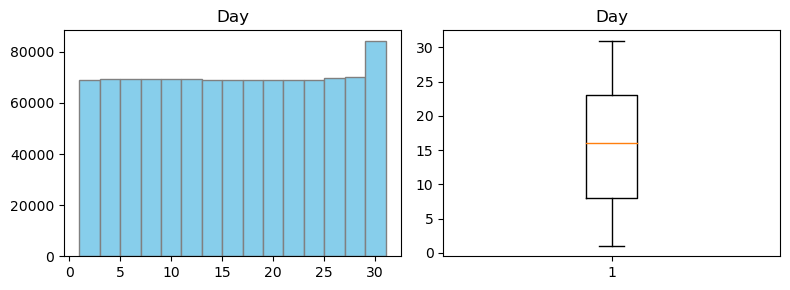

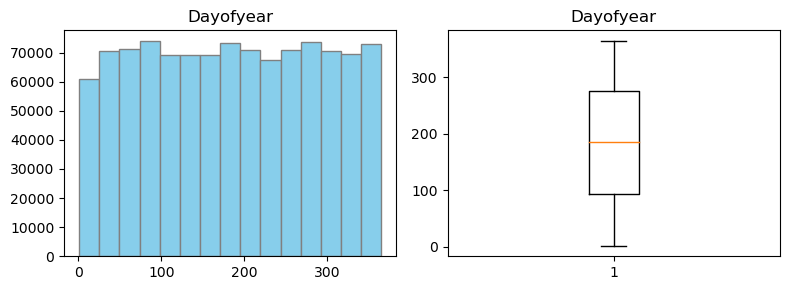

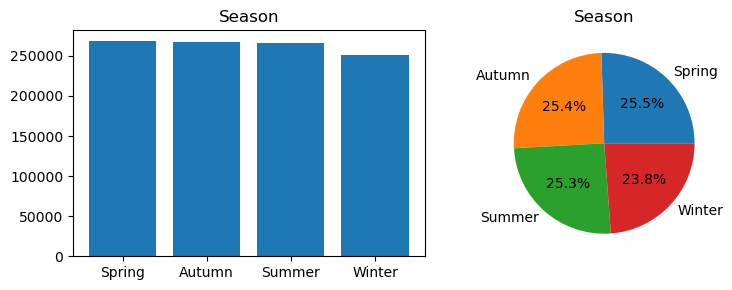

'Now, value_counts() for Season:'

Season
Spring    268503
Autumn    267356
Summer    266330
Winter    250854
Name: count, dtype: int64

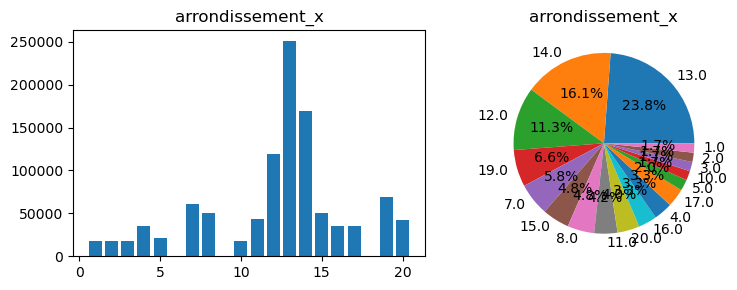

'Now, value_counts() for arrondissement_x:'

arrondissement_x
13.0    250814
14.0    169220
12.0    119020
19.0     69562
7.0      61313
15.0     50985
8.0      50558
11.0     43795
20.0     41750
16.0     35036
4.0      34962
17.0     34926
5.0      21030
10.0     17518
3.0      17518
2.0      17518
1.0      17518
Name: count, dtype: int64

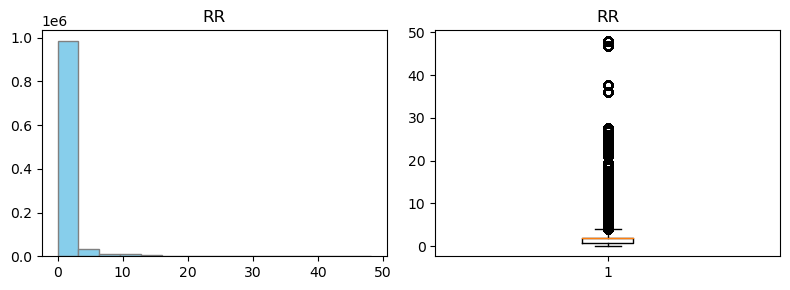

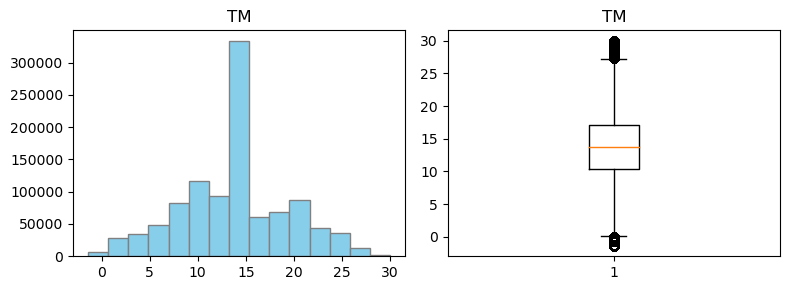

In [78]:
for i, column in enumerate(list(smart_3.columns)):
    if column=="ID":
        fig, ax = plt.subplots(1,2, figsize=(8, 3))
        ax[0].hist(column, bins=15, edgecolor='gray', color='skyblue')
        ax[0].set_title(column)
        plt.tight_layout()
        plt.show()
    
    if column in num_cols:
        univ_num(smart_3[column],column)
        
    if column in cat_cols:
        univ_cat(smart_3[column],column)
        display("Now, value_counts() for "+column+":")
        display(smart_3[column].value_counts())

In [ ]:
# we only kept the value only for year 2023
# we have roughly the same amount of value per month
# we can see that there are weeks with 60 000 values and weeks with 80 000 values
# we have more entries per day for the last days of months
# we have roughly the same amount of value per season
# we have 50% of the observation in the 12th, 13th and 14th districts
# RR values are mainly close to 0
# TM values are mainly around 15 then the other values look like a bell shape distribution

---

# IV. Bivariate Data Analysis

---

In [79]:
# Chi-Square Test for Categorical Variables

from scipy.stats import chi2, chi2_contingency
import math

x2_dict={}
temp=[]


for i in cat_cols:
    temp.append(i)
    for j in cat_cols:
        if not(j in temp):
            alpha=0.05
            cont_table=pd.crosstab(smart_3[i],smart_3[j], margins=True)
            display(cont_table)

            x2, pvalue, dof, expected_freq = chi2_contingency(pd.crosstab(smart_3[i],smart_3[j]), correction=False)
            critical_value = chi2.ppf(1 - alpha, df=dof)
            if abs(x2) > critical_value:
                print(
                    f"Reject Ho (variables are NOT likely independant)!\n X2={x2:.04f} C={critical_value:.04f} alpha={alpha:.04f} p-value={pvalue:.04f}"
                )
                conclusion="NOT likely independant"
            
            else:
                print(
                    f"Cannot reject Ho (variables are likely independant)!\n X2={x2:.04f} C={critical_value:.04f} alpha={alpha:.04f} p-value={pvalue:.04f}"
                )
                conclusion="likely independant"
            n=(cont_table.iloc[-1,-1])
            print("n ="+str(n))
            v_cramer=math.sqrt(x2/(n*(min(cont_table.shape)-1-1)))
            print(f"v_cramer={v_cramer}")
            x2_dict[str(i)+" / "+str(j)]={"conclusion":conclusion,"x2":x2,"critical_value":critical_value, "alpha":alpha, "pvalue":pvalue,"v_cramer":v_cramer }

test_df_chi=pd.DataFrame.from_dict(x2_dict)
display(test_df_chi)

Month      1      2      3      4      5      6      7      8      9     10  \
Year                                                                          
2023   77821  83130  92131  86902  89470  87232  91054  88044  88452  91095   
All    77821  83130  92131  86902  89470  87232  91054  88044  88452  91095   

Month     11     12      All  
Year                          
2023   87809  89903  1053043  
All    87809  89903  1053043

Cannot reject Ho (variables are likely independant)!
 X2=0.0000 C=nan alpha=0.0500 p-value=1.0000
n =1053043
v_cramer=nan


Season  Autumn  Spring  Summer  Winter      All
Year                                           
2023    267356  268503  266330  250854  1053043
All     267356  268503  266330  250854  1053043

Cannot reject Ho (variables are likely independant)!
 X2=0.0000 C=nan alpha=0.0500 p-value=1.0000
n =1053043
v_cramer=nan


arrondissement_x    1.0    2.0    3.0    4.0    5.0    7.0    8.0   10.0  \
Year                                                                       
2023              17518  17518  17518  34962  21030  61313  50558  17518   
All               17518  17518  17518  34962  21030  61313  50558  17518   

arrondissement_x   11.0    12.0    13.0    14.0   15.0   16.0   17.0   19.0  \
Year                                                                          
2023              43795  119020  250814  169220  50985  35036  34926  69562   
All               43795  119020  250814  169220  50985  35036  34926  69562   

arrondissement_x   20.0      All  
Year                              
2023              41750  1053043  
All               41750  1053043

Cannot reject Ho (variables are likely independant)!
 X2=0.0000 C=nan alpha=0.0500 p-value=1.0000
n =1053043
v_cramer=nan


Season  Autumn  Spring  Summer  Winter      All
Month                                          
1            0       0       0   77821    77821
2            0       0       0   83130    83130
3            0   92131       0       0    92131
4            0   86902       0       0    86902
5            0   89470       0       0    89470
6            0       0   87232       0    87232
7            0       0   91054       0    91054
8            0       0   88044       0    88044
9        88452       0       0       0    88452
10       91095       0       0       0    91095
11       87809       0       0       0    87809
12           0       0       0   89903    89903
All     267356  268503  266330  250854  1053043

Reject Ho (variables are NOT likely independant)!
 X2=3159129.0000 C=47.3999 alpha=0.0500 p-value=0.0000
n =1053043
v_cramer=1.0


arrondissement_x    1.0    2.0    3.0    4.0    5.0    7.0    8.0   10.0  \
Month                                                                      
1                  1488   1488   1488   2976   2232   5208   4464   1488   
2                  1344   1344   1344   2688   2016   4704   4032   1344   
3                  1488   1488   1488   2976   2232   5208   4464   1488   
4                  1440   1440   1440   2880   2160   5040   4320   1440   
5                  1488   1488   1488   2976   2232   5208   4464   1488   
6                  1440   1440   1440   2880   2038   5040   4320   1440   
7                  1488   1488   1488   2976   1488   5208   4464   1488   
8                  1488   1488   1488   2976    778   5208   3780   1488   
9                  1440   1440   1440   2880   1440   5040   4212   1440   
10                 1486   1486   1486   2972   1486   5201   4458   1486   
11                 1440   1440   1440   2806   1440   5040   3865   1440   
12                 1488   1488   1488   2976   1488   5208   3715   1488   
All               17518  17518  17518  34962  21030  61313  50558  17518   

arrondissement_x   11.0    12.0    13.0    14.0   15.0   16.0   17.0   19.0  \
Month                                                                         
1                  3720    7706   18694   10314   2976   2976   2976   5952   
2                  3360    9382   20160   13440   3961   2688   2587   5376   
3                  3720   10416   22204   14880   4464   2976   2967   5952   
4                  3600   10080   19222   14400   4320   2880   2880   5760   
5                  3720   10416   19534   14880   4464   2976   2976   5952   
6                  3600   10080   19726   14400   4320   2880   2880   5708   
7                  3720   10416   22320   14880   4464   2976   2976   5494   
8                  3720    9546   22200   13796   4464   2976   2976   5952   
9                  3600   10080   21600   14400   4320   2880   2880   5760   
10                 3715   10402   22290   14566   4458   2972   2972   5944   
11                 3600   10080   21404   14384   4310   2880   2880   5760   
12                 3720   10416   21460   14880   4464   2976   2976   5952   
All               43795  119020  250814  169220  50985  35036  34926  69562   

arrondissement_x   20.0      All  
Month                             
1                  1675    77821  
2                  3360    83130  
3                  3720    92131  
4                  3600    86902  
5                  3720    89470  
6                  3600    87232  
7                  3720    91054  
8                  3720    88044  
9                  3600    88452  
10                 3715    91095  
11                 3600    87809  
12                 3720    89903  
All               41750  1053043

Reject Ho (variables are NOT likely independant)!
 X2=4608.2612 C=207.9547 alpha=0.0500 p-value=0.0000
n =1053043
v_cramer=0.01994569376664704


arrondissement_x    1.0    2.0    3.0    4.0    5.0    7.0    8.0   10.0  \
Season                                                                     
Autumn             4366   4366   4366   8658   4366  15281  12535   4366   
Spring             4416   4416   4416   8832   6624  15456  13248   4416   
Summer             4416   4416   4416   8832   4304  15456  12564   4416   
Winter             4320   4320   4320   8640   5736  15120  12211   4320   
All               17518  17518  17518  34962  21030  61313  50558  17518   

arrondissement_x   11.0    12.0    13.0    14.0   15.0   16.0   17.0   19.0  \
Season                                                                        
Autumn            10915   30562   65294   43350  13088   8732   8732  17464   
Spring            11040   30912   60960   44160  13248   8832   8823  17664   
Summer            11040   30042   64246   43076  13248   8832   8832  17154   
Winter            10800   27504   60314   38634  11401   8640   8539  17280   
All               43795  119020  250814  169220  50985  35036  34926  69562   

arrondissement_x   20.0      All  
Season                            
Autumn            10915   267356  
Spring            11040   268503  
Summer            11040   266330  
Winter             8755   250854  
All               41750  1053043

Reject Ho (variables are NOT likely independant)!
 X2=1539.6223 C=65.1708 alpha=0.0500 p-value=0.0000
n =1053043
v_cramer=0.022076154382093566


Year / Month       Year / Season  \
conclusion      likely independant  likely independant   
x2                             0.0                 0.0   
critical_value                 NaN                 NaN   
alpha                         0.05                0.05   
pvalue                         1.0                 1.0   
v_cramer                       NaN                 NaN   

               Year / arrondissement_x          Month / Season  \
conclusion          likely independant  NOT likely independant   
x2                                 0.0               3159129.0   
critical_value                     NaN               47.399884   
alpha                             0.05                    0.05   
pvalue                             1.0                     0.0   
v_cramer                           NaN                     1.0   

               Month / arrondissement_x Season / arrondissement_x  
conclusion       NOT likely independant    NOT likely independant  
x2                           4608.26117               1539.622344  
critical_value               207.954717                 65.170769  
alpha                              0.05                      0.05  
pvalue                              0.0                       0.0  
v_cramer                       0.019946                  0.022076

In [ ]:
# the conclusion of the chi square test are:
"""
Year / Month: likely independant
Year / Season: likely independant
Year / arrondissement_x: likely independant
Month / Season: NOT likely independant
Month / arrondissement_x: NOT likely independant
Season / arrondissement_x:  NOT likely independant
"""

In [80]:
test_df_chi=pd.DataFrame.transpose(test_df_chi)
display(test_df_chi)

conclusion           x2 critical_value  \
Year / Month                   likely independant          0.0            NaN   
Year / Season                  likely independant          0.0            NaN   
Year / arrondissement_x        likely independant          0.0            NaN   
Month / Season             NOT likely independant    3159129.0      47.399884   
Month / arrondissement_x   NOT likely independant   4608.26117     207.954717   
Season / arrondissement_x  NOT likely independant  1539.622344      65.170769   

                          alpha pvalue  v_cramer  
Year / Month               0.05    1.0       NaN  
Year / Season              0.05    1.0       NaN  
Year / arrondissement_x    0.05    1.0       NaN  
Month / Season             0.05    0.0       1.0  
Month / arrondissement_x   0.05    0.0  0.019946  
Season / arrondissement_x  0.05    0.0  0.022076

In [81]:
# Check the significance of their relationship with the chi-square test & provide Cramer’s V

for i in range(len(cat_cols)):
    for j in range(i + 1, len(cat_cols)):
        var1 = cat_cols[i]
        var2 = cat_cols[j]
        
        contingency_table = pd.crosstab(smart_3[var1], smart_3[var2])
        
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        cramers_v = np.sqrt(phi2 / min(contingency_table.shape[0] - 1, contingency_table.shape[1] - 1))
        
        print(f"Chi-Square Test between {var1} and {var2}:")
        print(f"Chi-Square Value: {chi2}")
        print(f"P-Value: {p}")
        print(f"Degrees of Freedom: {dof}")
        print(f"Expected Frequencies Table:")
        print(expected)
        print(f"Cramer's V: {cramers_v}")
        print("\n")
        print('-' * 50)

Chi-Square Test between Year and Month:
Chi-Square Value: 0.0
P-Value: 1.0
Degrees of Freedom: 0
Expected Frequencies Table:
[[77821. 83130. 92131. 86902. 89470. 87232. 91054. 88044. 88452. 91095.
  87809. 89903.]]
Cramer's V: nan


--------------------------------------------------
Chi-Square Test between Year and Season:
Chi-Square Value: 0.0
P-Value: 1.0
Degrees of Freedom: 0
Expected Frequencies Table:
[[267356. 268503. 266330. 250854.]]
Cramer's V: nan


--------------------------------------------------
Chi-Square Test between Year and arrondissement_x:
Chi-Square Value: 0.0
P-Value: 1.0
Degrees of Freedom: 0
Expected Frequencies Table:
[[ 17518.  17518.  17518.  34962.  21030.  61313.  50558.  17518.  43795.
  119020. 250814. 169220.  50985.  35036.  34926.  69562.  41750.]]
Cramer's V: nan


--------------------------------------------------
Chi-Square Test between Month and Season:
Chi-Square Value: 3159129.0
P-Value: 0.0
Degrees of Freedom: 33
Expected Frequencies Table:
[[19

In [ ]:
# the conclusion of the significance of their relationship with the chi-square test are:
"""
Year / Month: Cramer's V: nan
Year / Season: Cramer's V: nan
Year / arrondissement_x: Cramer's V: nan
Month / Season: Cramer's V: 1.0
Month / arrondissement_x: Cramer's V: 0.019945693766647038
Season / arrondissement_x:  Cramer's V: 0.022076154382093562
"""

In [82]:
!pip install researchpy

In [83]:
# Chi-Square Test with researchpy

import researchpy

crosstab, res = researchpy.crosstab(smart_3['Month'],smart_3['Year'], test="chi-square")
crosstab, res

(          Year         
 Year      2023      All
 Month                  
 1        77821    77821
 2        83130    83130
 3        92131    92131
 4        86902    86902
 5        89470    89470
 6        87232    87232
 7        91054    91054
 8        88044    88044
 9        88452    88452
 10       91095    91095
 11       87809    87809
 12       89903    89903
 All    1053043  1053043,
                 Chi-square test  results
 0  Pearson Chi-square ( 0.0) =       0.0
 1                    p-value =       1.0
 2                 Cramer's V =       NaN)

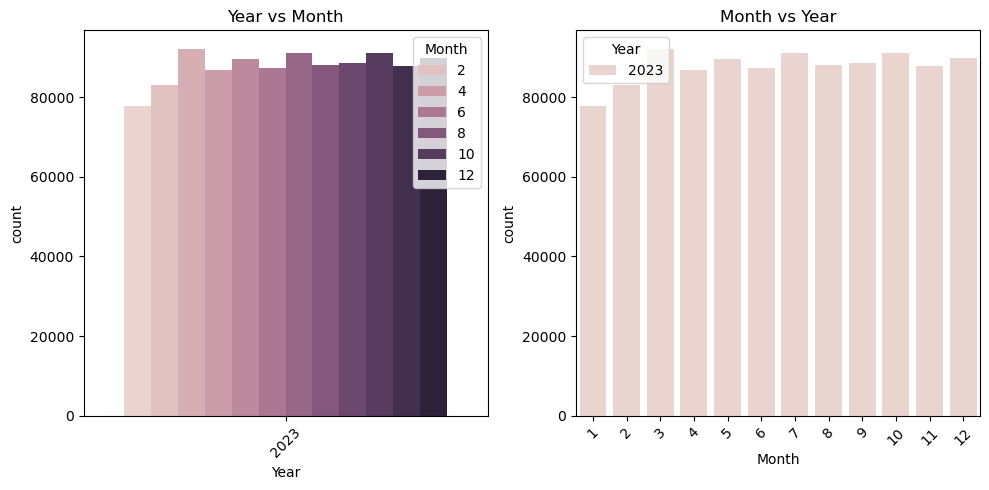

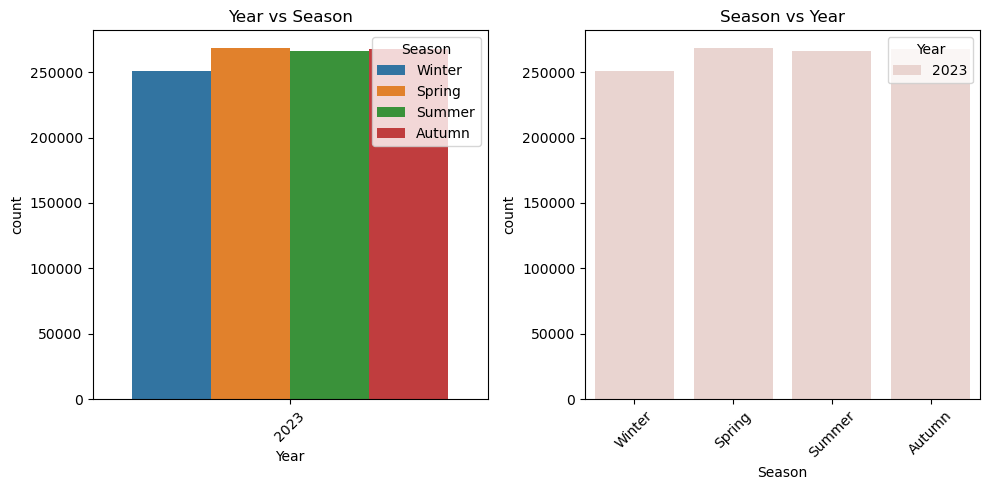

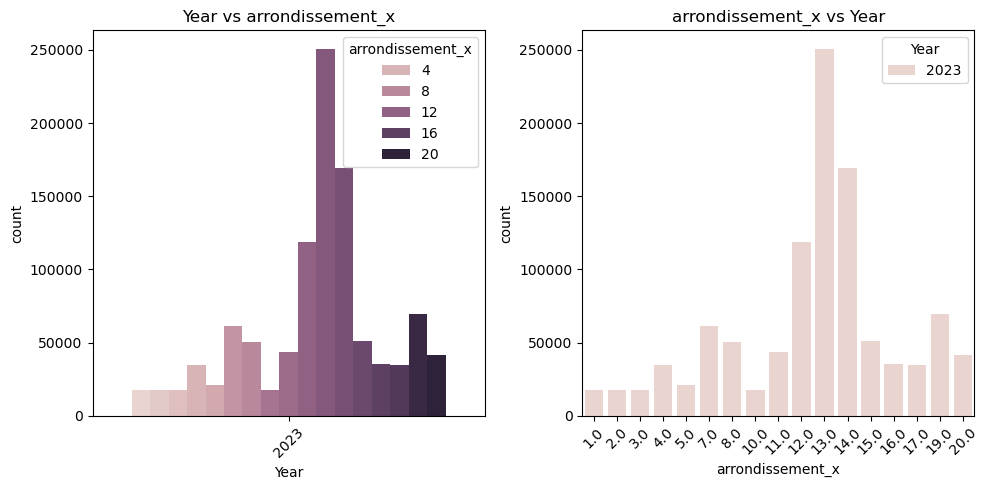

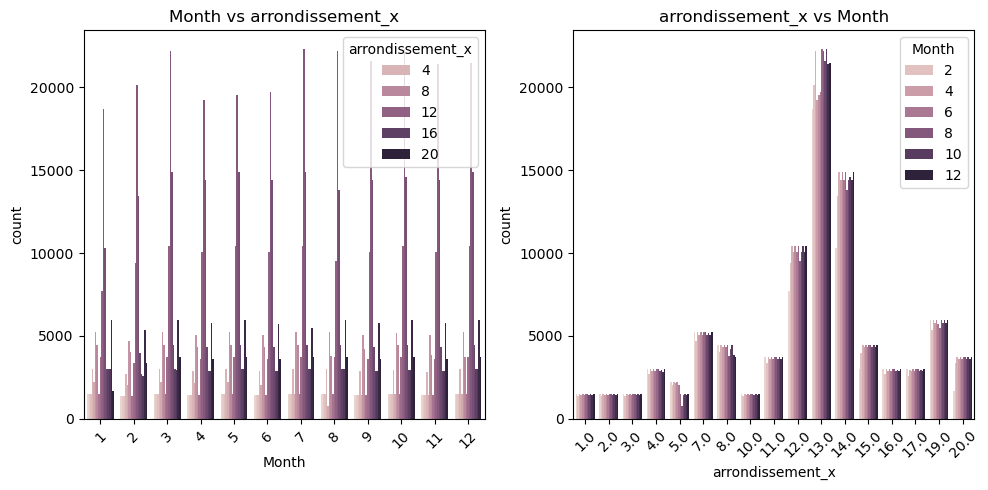

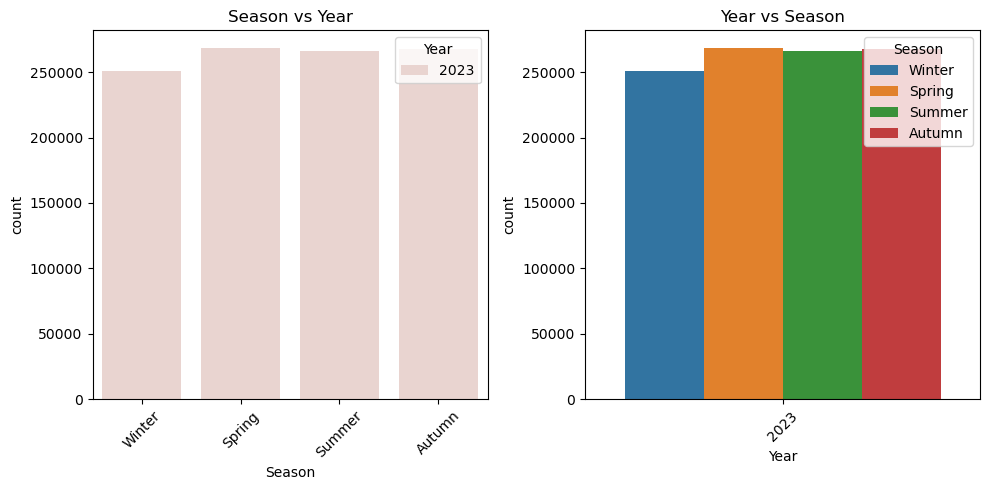

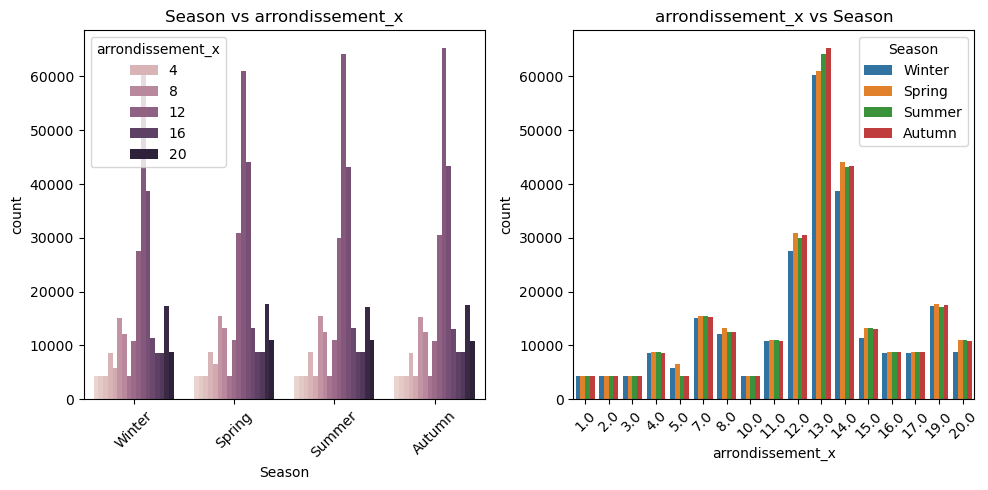

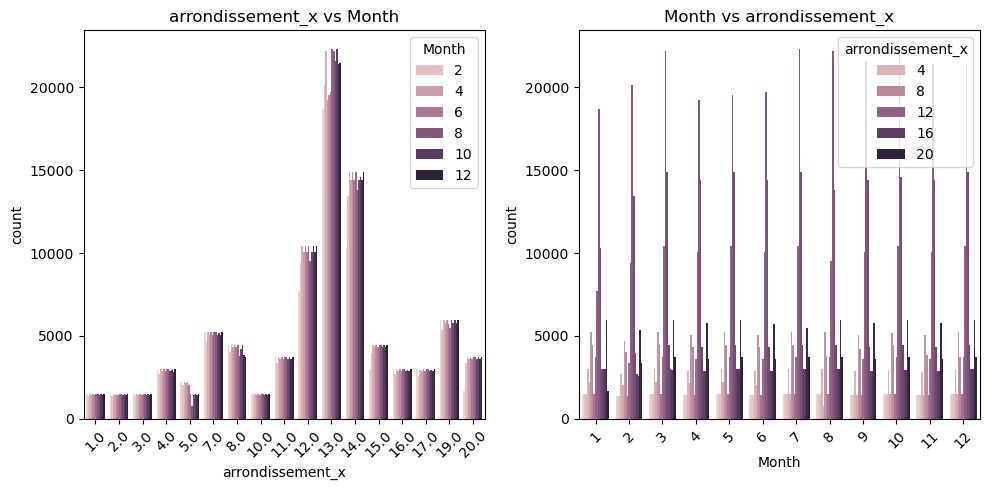

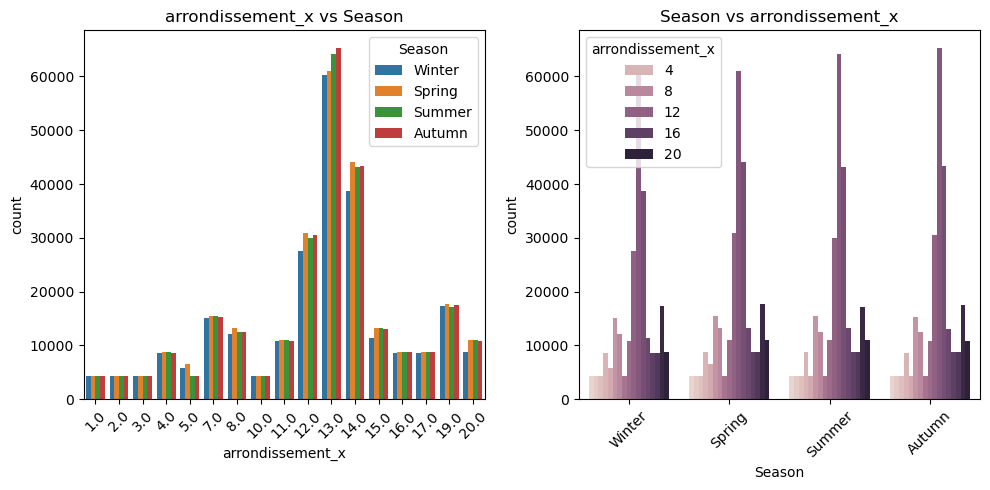

In [84]:
# Side-by-Side Bar Charts for Categorical Variables

for i, col1 in enumerate(cat_cols):
    for j, col2 in enumerate(cat_cols):
        if i != j:
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            sns.countplot(data=smart_3, x=col1, hue=col2)
            plt.title(f'{col1} vs {col2}')
            plt.xticks(rotation=45)
            
            plt.subplot(1, 2, 2)
            sns.countplot(data=smart_3, x=col2, hue=col1)
            plt.title(f'{col2} vs {col1}')
            plt.xticks(rotation=45)
            
            plt.tight_layout()
            plt.show()

In [ ]:
"""
# we can't see correlation and cannot say more than the univariate analysis
"""

---

In [85]:
# If the variables are both quantitative.

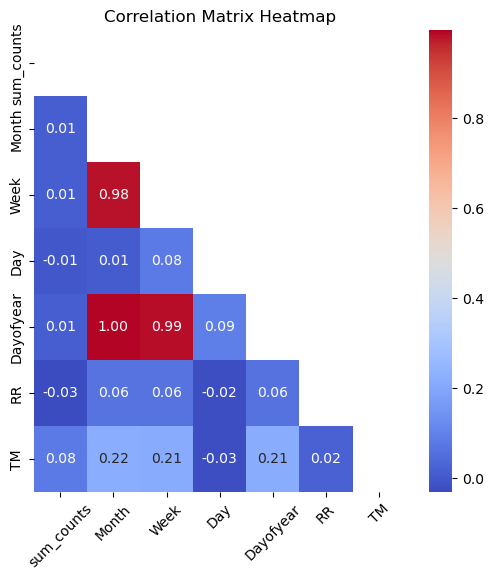

In [86]:
# Correlation Matrix and Heatmap
    
heatmap_cols=num_cols

correlation_matrix = smart_3[heatmap_cols].corr()

mask=np.triu(correlation_matrix)

plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",mask=mask)

plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.show()

In [ ]:
"""
The correlation found are obvious:
- between week and month
- between day of the year and month
- between day of the year and week


We may have a link between
- TM and month
- TM and week
"""

In [87]:
# Pearson Correlation Test

from scipy.stats import pearsonr

tt_dict={}
temp=[]
alpha=0.05

for i in num_cols:
    temp.append(i)
    for j in num_cols:
        if not(j in temp):
            r,p=pearsonr(smart_3[i],smart_3[j])
            
            if p>alpha:
                conclusion="2 means likely equals"
            else:
                conclusion="2 means NOT likely equals"
            
            tt_dict[str(i)+" / "+str(j)]={"conclusion":conclusion,"p-value":p,"Pearson s r":r}
tt_df=pd.DataFrame.from_dict(tt_dict)
display(tt_df)

sum_counts / Month          sum_counts / Week  \
conclusion   2 means NOT likely equals  2 means NOT likely equals   
p-value                            0.0                        0.0   
Pearson s r                   0.011192                   0.008403   

                      sum_counts / Day     sum_counts / Dayofyear  \
conclusion   2 means NOT likely equals  2 means NOT likely equals   
p-value                            0.0                        0.0   
Pearson s r                  -0.007688                   0.010412   

                       sum_counts / RR            sum_counts / TM  \
conclusion   2 means NOT likely equals  2 means NOT likely equals   
p-value                            0.0                        0.0   
Pearson s r                  -0.031796                   0.078789   

                          Month / Week                Month / Day  \
conclusion   2 means NOT likely equals  2 means NOT likely equals   
p-value                            0.0                        0.0   
Pearson s r                   0.983523                   0.006948   

                     Month / Dayofyear                 Month / RR  ...  \
conclusion   2 means NOT likely equals  2 means NOT likely equals  ...   
p-value                            0.0                        0.0  ...   
Pearson s r                   0.996433                   0.062017  ...   

                            Week / Day           Week / Dayofyear  \
conclusion   2 means NOT likely equals  2 means NOT likely equals   
p-value                            0.0                        0.0   
Pearson s r                   0.077908                   0.986102   

                             Week / RR                  Week / TM  \
conclusion   2 means NOT likely equals  2 means NOT likely equals   
p-value                            0.0                        0.0   
Pearson s r                   0.064166                   0.212439   

                       Day / Dayofyear                   Day / RR  \
conclusion   2 means NOT likely equals  2 means NOT likely equals   
p-value                            0.0                        0.0   
Pearson s r                   0.091054                  -0.024315   

                              Day / TM             Dayofyear / RR  \
conclusion   2 means NOT likely equals  2 means NOT likely equals   
p-value                            0.0                        0.0   
Pearson s r                  -0.027569                   0.059338   

                        Dayofyear / TM                    RR / TM  
conclusion   2 means NOT likely equals  2 means NOT likely equals  
p-value                            0.0                        0.0  
Pearson s r                   0.213513                   0.016621  

[3 rows x 21 columns]

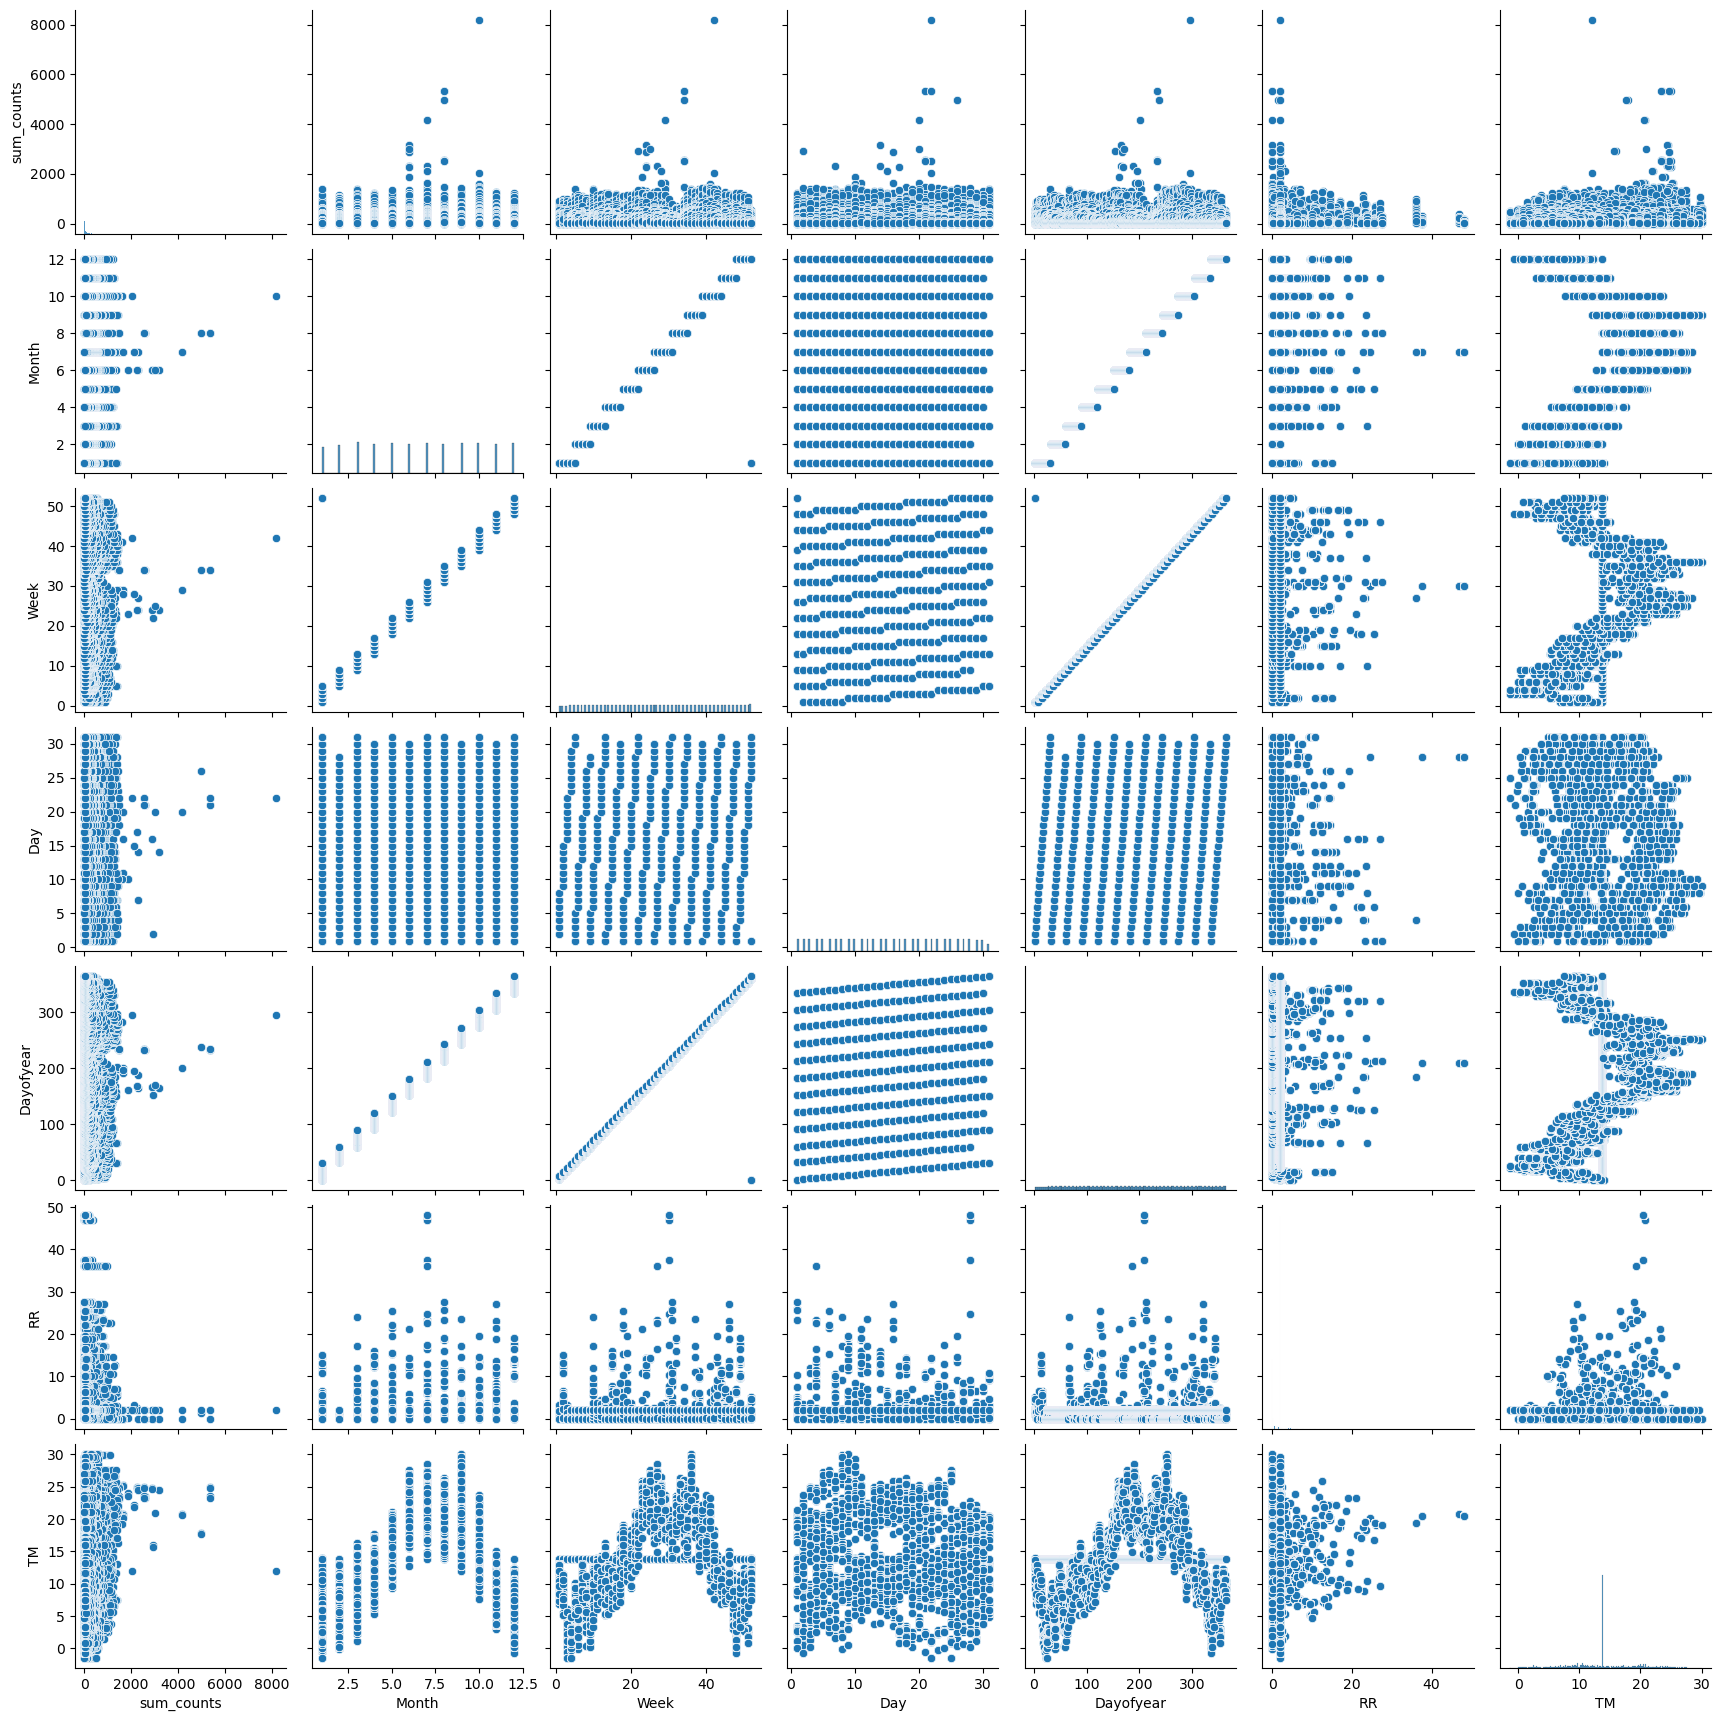

In [88]:
# Scatter Plot Matrix
sns.pairplot(smart_3[num_cols])
plt.show()

---

# V. Modeling. Regression

---

In [89]:
def LinearRegression_Step3(df, X_cols, y_cols,model):
    import numpy as np
    
    # split test and train set
    from sklearn.model_selection import train_test_split
    seed=42

    df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=seed)

    x_train=df_train[X_cols]
    x_test=df_test[X_cols]

    y_train=df_train[y_cols]
    y_test=df_test[y_cols]
    
    # fit and train the model
    for x in (x_train,x_test):
        if y_train.name in x.columns:
            x.drop(columns=y.name, inplace=True)
        
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score

    model_set = model
    model_set_fitted = model_set.fit(x_train,y_train)
    y_pred_train = model_set_fitted.predict(x_train)
    y_pred = model_set_fitted.predict(x_test)
    
    # computes all the performance indicators for a regression
    # The RMSE (root mean squared error)
    rmse_train=mean_squared_error(y_train, y_pred_train,squared=False)
    
    # The RMSE/mean(Y)
    rmse_m_train=(mean_squared_error(y_train, y_pred_train,squared=False))/(np.mean(df[y_train.name]))
    
    # R² The coefficient of determination: 1 is perfect prediction
    r2_train= r2_score(y_train, y_pred_train)
    
    # compute R²adjusted
    n_train=x_train.shape[0]
    p_train=x_train.shape[1]
    r_square_adj_train=abs(1-(n_train-1)*(1-r2_score(y_train, y_pred_train))/(n_train-p_train-1))
    
    rmse=mean_squared_error(y_test, y_pred,squared=False)
    
    # The RMSE/mean(Y)
    rmse_m=(mean_squared_error(y_test, y_pred,squared=False))/(np.mean(df[y_test.name]))
    
    r2= r2_score(y_test, y_pred)
    
    # compute R²adjusted
    n=x_test.shape[0]
    p=x_test.shape[1]
    r_square_adj=1-(n-1)*(1-r2_score(y_test, y_pred))/(n-p-1)
    
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    
    perf_df=pd.DataFrame([rmse_train,rmse, rmse_m_train,rmse_m, r2_train, r2, r_square_adj_train, r_square_adj,
                          train_score,test_score],
                          index=["RMSE error_train","RMSE error_test","RMSE/mean(Y)_train","RMSE/mean(Y)_test",
                                 "R²_train", "R²_test","R²adjusted_train","R²adjusted_test",
                                 "Train score","Test score"],
                          columns=[str(model)]
                          )
    
    if "LinearRegression" in str(model):
        
        # compute the betas for linear regrassion only
        betas=model_set_fitted.coef_
        beta_zero=model_set_fitted.intercept_
        print("beta_zero: %.3f" % beta_zero)
        for i in range(len(betas)):
            print("beta "+str(i+1)+" = "+str(betas[i]))
        #return linres,rmse,rmse_m,r2,r_square_adj

        # standardize the result
        import numpy as np
        my_dict={"index":["coefficient (weight)","standardized coefficients"]}
        y_std=np.std(y_test)
        my_dict["beta 0"]=[beta_zero,0]
        for i in range(len(betas)):
            if x_test.iloc[:,i].name != y_test.name:
                x_std=np.std(x_test.iloc[:,i])
                my_dict["beta "+str(i+1)+" "+x_test.iloc[:,i].name] = [betas[i], ((np.std(x_test.iloc[:,i]))/y_std*betas[i]) ]
        my_table=pd.DataFrame.from_dict(my_dict)
        my_table.set_index("index",drop=True, append=False, inplace=True, verify_integrity=False)
        display(my_table)
        return perf_df, my_table
    else:
        return perf_df, None

In [90]:
# Data Preparation for Regression
smart4= smart_3.copy()

In [91]:
smart4.head()

nom_compteur                         name  sum_counts  \
0  97 avenue Denfert Rochereau SO-NE  97 avenue Denfert Rochereau          16   
1  97 avenue Denfert Rochereau SO-NE  97 avenue Denfert Rochereau          16   
2  97 avenue Denfert Rochereau SO-NE  97 avenue Denfert Rochereau          14   
3  97 avenue Denfert Rochereau SO-NE  97 avenue Denfert Rochereau          14   
4  97 avenue Denfert Rochereau SO-NE  97 avenue Denfert Rochereau           0   

         coordinates mois_annee_comptage  Year  Month  Week       Date  Day  \
0  48.83504, 2.33314             2023-01  2023      1    52 2023-01-01    1   
1  48.83504, 2.33314             2023-01  2023      1    52 2023-01-01    1   
2  48.83504, 2.33314             2023-01  2023      1    52 2023-01-01    1   
3  48.83504, 2.33314             2023-01  2023      1    52 2023-01-01    1   
4  48.83504, 2.33314             2023-01  2023      1    52 2023-01-01    1   

   ...  Dayofyear  Is_month_end  Is_month_start  Hour  Season  \
0  ...          1         False            True     1  Winter   
1  ...          1         False            True     1  Winter   
2  ...          1         False            True     4  Winter   
3  ...          1         False            True     4  Winter   
4  ...          1         False            True     5  Winter   

                   geometry arrondissement_x        RR    TM  arrondissement_y  
0  POINT (48.83504 2.33314)             14.0  5.200000  13.0              14.0  
1  POINT (48.83504 2.33314)             14.0  1.952891  13.0              14.0  
2  POINT (48.83504 2.33314)             14.0  5.200000  13.0              14.0  
3  POINT (48.83504 2.33314)             14.0  1.952891  13.0              14.0  
4  POINT (48.83504 2.33314)             14.0  5.200000  13.0              14.0  

[5 rows x 21 columns]

In [92]:
smart4.columns

Index(['nom_compteur', 'name', 'sum_counts', 'coordinates',
       'mois_annee_comptage', 'Year', 'Month', 'Week', 'Date', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start', 'Hour',
       'Season', 'geometry', 'arrondissement_x', 'RR', 'TM',
       'arrondissement_y'],
      dtype='object')

In [93]:
# Data Cleaning and Transformation:
smart4.drop(columns=['name',  'mois_annee_comptage','coordinates', 'Date','arrondissement_y','geometry'], inplace=True)
df_dummies=pd.get_dummies(smart4, drop_first=True)
display(df_dummies.head())

sum_counts  Year  Month  Week  Day  Dayofweek  Dayofyear  Is_month_end  \
0          16  2023      1    52    1          6          1         False   
1          16  2023      1    52    1          6          1         False   
2          14  2023      1    52    1          6          1         False   
3          14  2023      1    52    1          6          1         False   
4           0  2023      1    52    1          6          1         False   

   Is_month_start  Hour  ...  \
0            True     1  ...   
1            True     1  ...   
2            True     4  ...   
3            True     4  ...   
4            True     5  ...   

   nom_compteur_Totem 73 boulevard de Sébastopol S-N  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   

   nom_compteur_Totem 85 quai d'Austerlitz NO-SE  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   nom_compteur_Totem 85 quai d'Austerlitz SE-NO  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   nom_compteur_Totem Cours la Reine E-O  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   

   nom_compteur_Totem Cours la Reine O-E  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   

   nom_compteur_Voie Georges Pompidou NE-SO  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   nom_compteur_Voie Georges Pompidou SO-NE  Season_Spring  Season_Summer  \
0                                     False          False          False   
1                                     False          False          False   
2                                     False          False          False   
3                                     False          False          False   
4                                     False          False          False   

   Season_Winter  
0           True  
1           True  
2           True  
3           True  
4           True  

[5 rows x 114 columns]

In [94]:
smart4.columns

Index(['nom_compteur', 'sum_counts', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start', 'Hour',
       'Season', 'arrondissement_x', 'RR', 'TM'],
      dtype='object')

In [95]:
# Regression Analysis

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import RandomForestRegressor

X_cols=df_dummies.columns.drop('sum_counts')
y_cols='sum_counts'


regressors = [LinearRegression(),
               DecisionTreeRegressor(),
               SGDRegressor(),
               ElasticNet(),
               RandomForestRegressor(n_jobs=-1)
               ]

In [96]:
perf_df=pd.DataFrame(index=["RMSE error_train","RMSE error_test","RMSE/mean(Y)_train","RMSE/mean(Y)_test",
                                 "R²_train", "R²_test","R²adjusted_train","R²adjusted_test","Train score","Test score"])

for i in regressors:
    print("= ! = ! = ! = ! = ! = ! = ! = ! = ! = ! "+str(i))
    if "LinearRegression" in str(i):
        result, beta_lin=LinearRegression_Step3(df_dummies, X_cols, y_cols,i)
    else:
        result, _ =LinearRegression_Step3(df_dummies, X_cols, y_cols,i)
    perf_df =perf_df.join(result)
display(perf_df)
display(beta_lin)

= ! = ! = ! = ! = ! = ! = ! = ! = ! = ! LinearRegression()
beta_zero: 34360472836.426
beta 1 = -669167.663435957
beta 2 = 290.1495497800561
beta 3 = -0.6943911942216219
beta 4 = 9.4432594249966
beta 5 = -5.881512636835545
beta 6 = -9.503570755461883
beta 7 = 3.4026132202288153
beta 8 = -6.058154776646136
beta 9 = 2.3742989250045614
beta 10 = -1941573347.5488274
beta 11 = -1.2609540156374948
beta 12 = 1.078989919796527
beta 13 = -7766293378.320496
beta 14 = -13591013255.251684
beta 15 = -5824719987.7712345
beta 16 = -3883146674.7443233
beta 17 = -3883146678.9077077
beta 18 = -9707866696.783655
beta 19 = -7766293374.931468
beta 20 = -5824720021.755027
beta 21 = -5824720028.224581
beta 22 = -3.2199851027618314
beta 23 = -5824720014.990085
beta 24 = -25240453520.243797
beta 25 = -25240453507.56759
beta 26 = -7766293371.162631
beta 27 = -7766293393.876517
beta 28 = -5824720005.029305
beta 29 = -19415733430.547523
beta 30 = 5824720035.325565
beta 31 = -9707866704.107851
beta 32 = -2329888010

beta 0    beta 1 Year  beta 2 Month  \
index                                                                  
coefficient (weight)       3.436047e+10 -669167.663436    290.149550   
standardized coefficients  0.000000e+00      -0.000000      9.795495   

                           beta 3 Week  beta 4 Day  beta 5 Dayofweek  \
index                                                                  
coefficient (weight)         -0.694391    9.443259         -5.881513   
standardized coefficients    -0.102284    0.821416         -0.116149   

                           beta 6 Dayofyear  beta 7 Is_month_end  \
index                                                              
coefficient (weight)              -9.503571             3.402613   
standardized coefficients         -9.803121             0.005975   

                           beta 8 Is_month_start  beta 9 Hour  ...  \
index                                                          ...   
coefficient (weight)                   -6.058155     2.374299  ...   
standardized coefficients              -0.010693     0.162271  ...   

                           beta 104 nom_compteur_Totem 73 boulevard de Sébastopol S-N  \
index                                                                                   
coefficient (weight)                                           -2.912360e+10            
standardized coefficients                                      -2.611766e+07            

                           beta 105 nom_compteur_Totem 85 quai d'Austerlitz NO-SE  \
index                                                                               
coefficient (weight)                                           -7.766293e+09        
standardized coefficients                                      -9.802681e+06        

                           beta 106 nom_compteur_Totem 85 quai d'Austerlitz SE-NO  \
index                                                                               
coefficient (weight)                                           -7.766293e+09        
standardized coefficients                                      -9.882186e+06        

                           beta 107 nom_compteur_Totem Cours la Reine E-O  \
index                                                                       
coefficient (weight)                                        -1.747416e+10   
standardized coefficients                                   -1.481733e+07   

                           beta 108 nom_compteur_Totem Cours la Reine O-E  \
index                                                                       
coefficient (weight)                                        -1.747416e+10   
standardized coefficients                                   -1.545171e+07   

                           beta 109 nom_compteur_Voie Georges Pompidou NE-SO  \
index                                                                          
coefficient (weight)                                           -1.941573e+09   
standardized coefficients                                      -1.746097e+06   

                           beta 110 nom_compteur_Voie Georges Pompidou SO-NE  \
index                                                                          
coefficient (weight)                                           -1.941573e+09   
standardized coefficients                                      -1.794055e+06   

                           beta 111 Season_Spring  beta 112 Season_Summer  \
index                                                                       
coefficient (weight)                   -34.235749              -26.763523   
standardized coefficients               -0.147362               -0.114988   

                           beta 113 Season_Winter  
index                                              
coefficient (weight)                   -21.819664  
standardized coefficients               -0.091860  

[2 rows x 114 columns]

= ! = ! = ! = ! = ! = ! = ! = ! = ! = ! DecisionTreeRegressor()
= ! = ! = ! = ! = ! = ! = ! = ! = ! = ! SGDRegressor()
= ! = ! = ! = ! = ! = ! = ! = ! = ! = ! ElasticNet()
= ! = ! = ! = ! = ! = ! = ! = ! = ! = ! RandomForestRegressor(n_jobs=-1)


LinearRegression()  DecisionTreeRegressor()  \
RMSE error_train             84.395289                 0.000000   
RMSE error_test              85.309605                32.983750   
RMSE/mean(Y)_train            1.136623                 0.000000   
RMSE/mean(Y)_test             1.148936                 0.444220   
R²_train                      0.295808                 1.000000   
R²_test                       0.290512                 0.893941   
R²adjusted_train              0.295714                 1.000000   
R²adjusted_test               0.290131                 0.893884   
Train score                   0.295808                 1.000000   
Test score                    0.290512                 0.893941   

                    SGDRegressor()  ElasticNet()  \
RMSE error_train      1.784642e+14     95.095733   
RMSE error_test       1.784259e+14     95.900739   
RMSE/mean(Y)_train    2.403527e+12      1.280734   
RMSE/mean(Y)_test     2.403013e+12      1.291576   
R²_train             -3.148883e+24      0.105920   
R²_test              -3.103595e+24      0.103412   
R²adjusted_train      3.149305e+24      0.105800   
R²adjusted_test      -3.105261e+24      0.102931   
Train score          -3.148883e+24      0.105920   
Test score           -3.103595e+24      0.103412   

                    RandomForestRegressor(n_jobs=-1)  
RMSE error_train                           10.463665  
RMSE error_test                            27.058291  
RMSE/mean(Y)_train                          0.140923  
RMSE/mean(Y)_test                           0.364417  
R²_train                                    0.989175  
R²_test                                     0.928624  
R²adjusted_train                            0.989174  
R²adjusted_test                             0.928586  
Train score                                 0.989175  
Test score                                  0.928624

beta 0    beta 1 Year  beta 2 Month  \
index                                                                  
coefficient (weight)       3.436047e+10 -669167.663436    290.149550   
standardized coefficients  0.000000e+00      -0.000000      9.795495   

                           beta 3 Week  beta 4 Day  beta 5 Dayofweek  \
index                                                                  
coefficient (weight)         -0.694391    9.443259         -5.881513   
standardized coefficients    -0.102284    0.821416         -0.116149   

                           beta 6 Dayofyear  beta 7 Is_month_end  \
index                                                              
coefficient (weight)              -9.503571             3.402613   
standardized coefficients         -9.803121             0.005975   

                           beta 8 Is_month_start  beta 9 Hour  ...  \
index                                                          ...   
coefficient (weight)                   -6.058155     2.374299  ...   
standardized coefficients              -0.010693     0.162271  ...   

                           beta 104 nom_compteur_Totem 73 boulevard de Sébastopol S-N  \
index                                                                                   
coefficient (weight)                                           -2.912360e+10            
standardized coefficients                                      -2.611766e+07            

                           beta 105 nom_compteur_Totem 85 quai d'Austerlitz NO-SE  \
index                                                                               
coefficient (weight)                                           -7.766293e+09        
standardized coefficients                                      -9.802681e+06        

                           beta 106 nom_compteur_Totem 85 quai d'Austerlitz SE-NO  \
index                                                                               
coefficient (weight)                                           -7.766293e+09        
standardized coefficients                                      -9.882186e+06        

                           beta 107 nom_compteur_Totem Cours la Reine E-O  \
index                                                                       
coefficient (weight)                                        -1.747416e+10   
standardized coefficients                                   -1.481733e+07   

                           beta 108 nom_compteur_Totem Cours la Reine O-E  \
index                                                                       
coefficient (weight)                                        -1.747416e+10   
standardized coefficients                                   -1.545171e+07   

                           beta 109 nom_compteur_Voie Georges Pompidou NE-SO  \
index                                                                          
coefficient (weight)                                           -1.941573e+09   
standardized coefficients                                      -1.746097e+06   

                           beta 110 nom_compteur_Voie Georges Pompidou SO-NE  \
index                                                                          
coefficient (weight)                                           -1.941573e+09   
standardized coefficients                                      -1.794055e+06   

                           beta 111 Season_Spring  beta 112 Season_Summer  \
index                                                                       
coefficient (weight)                   -34.235749              -26.763523   
standardized coefficients               -0.147362               -0.114988   

                           beta 113 Season_Winter  
index                                              
coefficient (weight)                   -21.819664  
standardized coefficients               -0.091860  

[2 rows x 114 columns]

In [97]:
display(perf_df)

LinearRegression()  DecisionTreeRegressor()  \
RMSE error_train             84.395289                 0.000000   
RMSE error_test              85.309605                32.983750   
RMSE/mean(Y)_train            1.136623                 0.000000   
RMSE/mean(Y)_test             1.148936                 0.444220   
R²_train                      0.295808                 1.000000   
R²_test                       0.290512                 0.893941   
R²adjusted_train              0.295714                 1.000000   
R²adjusted_test               0.290131                 0.893884   
Train score                   0.295808                 1.000000   
Test score                    0.290512                 0.893941   

                    SGDRegressor()  ElasticNet()  \
RMSE error_train      1.784642e+14     95.095733   
RMSE error_test       1.784259e+14     95.900739   
RMSE/mean(Y)_train    2.403527e+12      1.280734   
RMSE/mean(Y)_test     2.403013e+12      1.291576   
R²_train             -3.148883e+24      0.105920   
R²_test              -3.103595e+24      0.103412   
R²adjusted_train      3.149305e+24      0.105800   
R²adjusted_test      -3.105261e+24      0.102931   
Train score          -3.148883e+24      0.105920   
Test score           -3.103595e+24      0.103412   

                    RandomForestRegressor(n_jobs=-1)  
RMSE error_train                           10.463665  
RMSE error_test                            27.058291  
RMSE/mean(Y)_train                          0.140923  
RMSE/mean(Y)_test                           0.364417  
R²_train                                    0.989175  
R²_test                                     0.928624  
R²adjusted_train                            0.989174  
R²adjusted_test                             0.928586  
Train score                                 0.989175  
Test score                                  0.928624

In [98]:
# Plotting the performance metrics as a line plot
lines = perf_df.plot.line(rot=90)

In [99]:
perf_df_withoutSGD = perf_df.drop(columns=["SGDRegressor()"],index=["Train score","Test score"])
lines = perf_df_withoutSGD.plot.line(rot=90)

In [ ]:
"""
We can see that random forest is the best model without tuning.
RandomForestRegressor(n_jobs=-1)	
RMSE error_train	10.463665
RMSE error_test	27.058291
RMSE/mean(Y)_train	0.140923
RMSE/mean(Y)_test	0.364417
R²_train	0.989175
R²_test	0.928624
R²adjusted_train	0.989174
R²adjusted_test	0.928586
Train score	0.989175
Test score	0.928624


Also linear regression revealed significant predictors for bicycle demand.
"""

---

# VI. Exploratory Data Analysis

---

In [100]:
smart2 = smart4.copy()

In [101]:
smart2['date'] = pd.to_datetime(smart2[['Year', 'Month', 'Day']])

smart2.set_index('date', inplace=True)

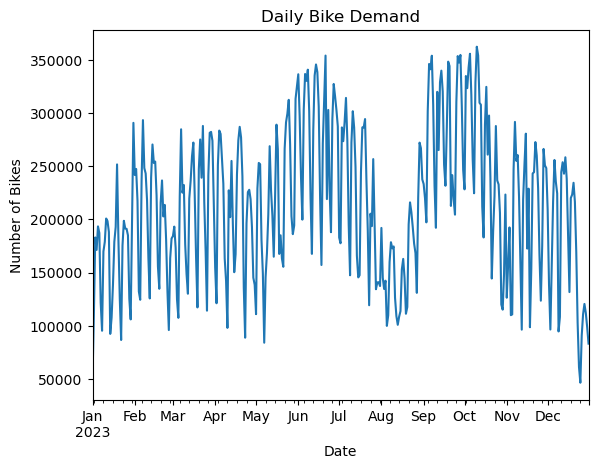

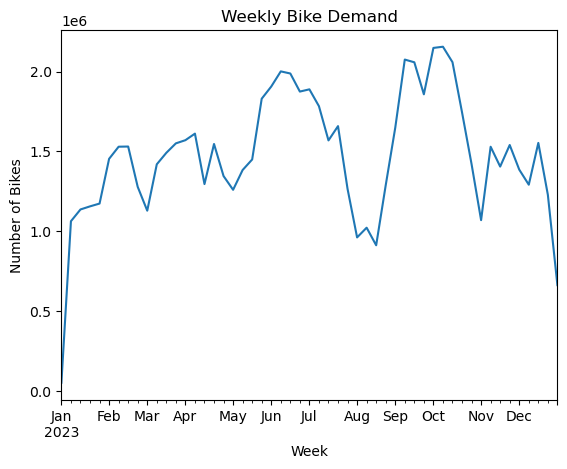

In [102]:
# Examine Daily, Weekly, and Monthly Trends

# Daily Trends
smart2['sum_counts'].resample('D').sum().plot()
plt.title('Daily Bike Demand')
plt.xlabel('Date')
plt.ylabel('Number of Bikes')
plt.show()

# Weekly Trends
smart2['sum_counts'].resample('W').sum().plot()
plt.title('Weekly Bike Demand')
plt.xlabel('Week')
plt.ylabel('Number of Bikes')
plt.show()

# Monthly Trends
smart2['sum_counts'].resample('M').sum().plot()
plt.title('Monthly Bike Demand')
plt.xlabel('Month')
plt.ylabel('Number of Bikes')
plt.show()

* Daily bike demand: The daily bicycle demand graph shows variations in the number of bicycles used each day throughout 2023. There is a repeating pattern that shows weekly cycles of high and low usage, corresponding to weekdays and weekends. It is also apparent that usage increases and decreases, with a notable dip in demand during the month of August, likely due to the holiday season. The varying demand is also due to weather conditions or other seasonal factors that influence bicycle use.

* Weekly bike demand: The weekly bike demand graph shows a more regular trend compared to the daily fluctuations. There is a consistent rhythm of repeating peaks and troughs, likely reflecting commuting patterns during the week and on weekends.

* Monthly bike demand: The monthly bike demand graph shows the total number of bikes used each month. It is clear that more people ride bikes in the warmer months and fewer in the colder months.

---

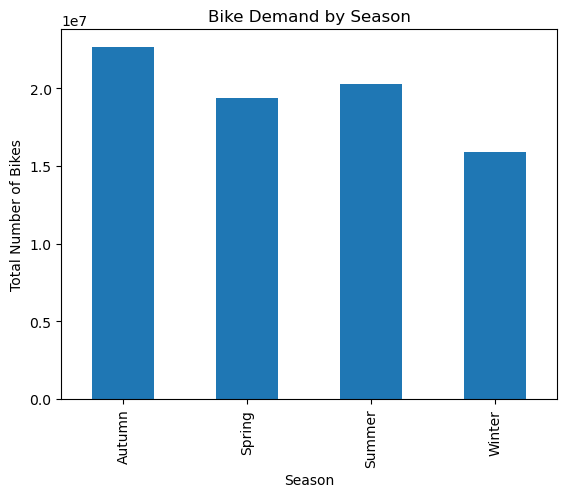

In [103]:
# Analyze Seasonal Variations

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

smart2['Season'] = smart2['Month'].apply(get_season)

seasonal_demand = smart2.groupby('Season')['sum_counts'].sum()

seasonal_demand.plot(kind='bar')
plt.title('Bike Demand by Season')
plt.xlabel('Season')
plt.ylabel('Total Number of Bikes')
plt.show()

The graph shows the demand for bicycles by season. It clearly shows that fall has the highest demand for bikes, followed by spring. Demand is lower in the summer and lowest in the winter.

---

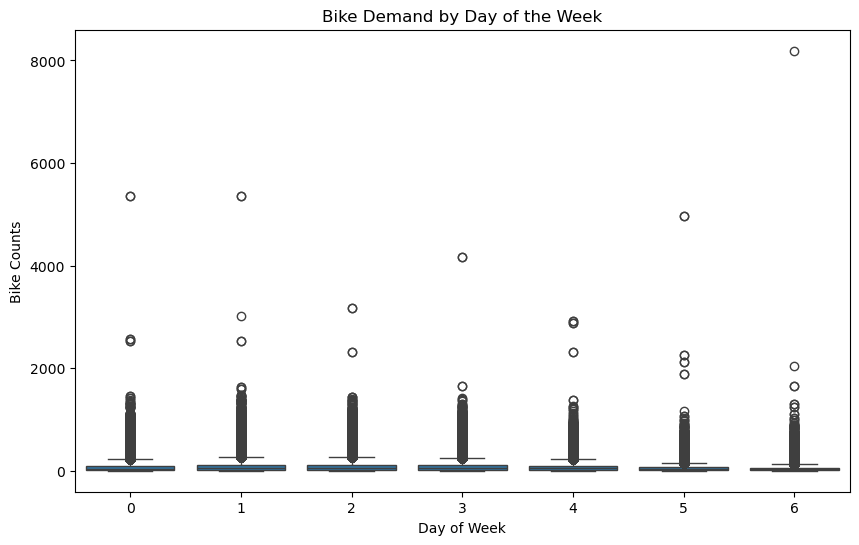

In [104]:
# Explore Correlations with Other Variables

plt.figure(figsize=(10, 6))
sns.boxplot(x='Dayofweek', y='sum_counts', data=smart2)
plt.title('Bike Demand by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Bike Counts')
plt.show()

The boxplot graph shows bike usage for each day of the week, from Sunday (0) to Saturday (6). The vertical bars show where most of the usage falls: the line in the middle of each bar is the median usage.

---

 **Some Conclusion from Exploratory Data Analysis**

* For seasonal variations, we can conclude that bicycle use is influenced by seasonal changes, with demand peaking in the summer months.

* The analysis also shows variations in bicycle demand between different days of the week, highlighting potential trends linked to commuting. At weekends, the increase in usage suggests that people are using bikes more for leisure activities or outings.

* The analysis may also show peaks in usage at certain times, which may indicate peak commuting times.

---

In [105]:
# Map of trafic of bikes

grouped = smart.groupby('coordinates')['sum_counts'].sum().reset_index()
grouped[['latitude', 'longitude']] = grouped['coordinates'].str.split(',', expand=True)
grouped['latitude'] = grouped['latitude'].astype(float)
grouped['longitude'] = grouped['longitude'].astype(float)

def get_color(sum_counts): 
    if sum_counts > 5000000:
        return 'blue'
    elif sum_counts > 3000000:
        return 'yellow'
    elif sum_counts > 1000000:
        return 'green'
    else:
        return 'red'

# Create map centered around the first coordinate
map_center = [grouped['latitude'].iloc[0], grouped['longitude'].iloc[0]]
my_map = folium.Map(location=map_center, zoom_start=12)

for index, row in grouped.iterrows():
    
    bubble_size = row['sum_counts'] / 10000 
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius=bubble_size * 2, 
        color=get_color(row['sum_counts']),
        fill=True,
        fill_color=get_color(row['sum_counts']),
        popup=str(row['sum_counts'])  
    ).add_to(my_map)

my_map

---

# VII. Time Series Analysis

---

In [106]:
smart.head()

id_compteur  \
main_date                                        
2022-12-01 04:00:00+00:00  100003096-353242251   
2022-12-01 07:00:00+00:00  100003096-353242251   
2022-12-01 03:00:00+00:00  100003096-353242251   
2022-12-01 06:00:00+00:00  100003096-353242251   
2022-12-01 09:00:00+00:00  100003096-353242251   

                                                nom_compteur         id  \
main_date                                                                 
2022-12-01 04:00:00+00:00  97 avenue Denfert Rochereau SO-NE  100003096   
2022-12-01 07:00:00+00:00  97 avenue Denfert Rochereau SO-NE  100003096   
2022-12-01 03:00:00+00:00  97 avenue Denfert Rochereau SO-NE  100003096   
2022-12-01 06:00:00+00:00  97 avenue Denfert Rochereau SO-NE  100003096   
2022-12-01 09:00:00+00:00  97 avenue Denfert Rochereau SO-NE  100003096   

                                                  name  sum_counts  \
main_date                                                            
2022-12-01 04:00:00+00:00  97 avenue Denfert Rochereau           4   
2022-12-01 07:00:00+00:00  97 avenue Denfert Rochereau         339   
2022-12-01 03:00:00+00:00  97 avenue Denfert Rochereau           1   
2022-12-01 06:00:00+00:00  97 avenue Denfert Rochereau         129   
2022-12-01 09:00:00+00:00  97 avenue Denfert Rochereau         105   

                          installation_date  \
main_date                                     
2022-12-01 04:00:00+00:00        2012-02-22   
2022-12-01 07:00:00+00:00        2012-02-22   
2022-12-01 03:00:00+00:00        2012-02-22   
2022-12-01 06:00:00+00:00        2012-02-22   
2022-12-01 09:00:00+00:00        2012-02-22   

                                                               url_photos_n1  \
main_date                                                                      
2022-12-01 04:00:00+00:00  https://filer.eco-counter-tools.com/file/93/e7...   
2022-12-01 07:00:00+00:00  https://filer.eco-counter-tools.com/file/93/e7...   
2022-12-01 03:00:00+00:00  https://filer.eco-counter-tools.com/file/93/e7...   
2022-12-01 06:00:00+00:00  https://filer.eco-counter-tools.com/file/93/e7...   
2022-12-01 09:00:00+00:00  https://filer.eco-counter-tools.com/file/93/e7...   

                                 coordinates      counter  \
main_date                                                   
2022-12-01 04:00:00+00:00  48.83504, 2.33314  Y2H21111072   
2022-12-01 07:00:00+00:00  48.83504, 2.33314  Y2H21111072   
2022-12-01 03:00:00+00:00  48.83504, 2.33314  Y2H21111072   
2022-12-01 06:00:00+00:00  48.83504, 2.33314  Y2H21111072   
2022-12-01 09:00:00+00:00  48.83504, 2.33314  Y2H21111072   

                                                                      photos  \
main_date                                                                      
2022-12-01 04:00:00+00:00  https://filer.eco-counter-tools.com/file/93/e7...   
2022-12-01 07:00:00+00:00  https://filer.eco-counter-tools.com/file/93/e7...   
2022-12-01 03:00:00+00:00  https://filer.eco-counter-tools.com/file/93/e7...   
2022-12-01 06:00:00+00:00  https://filer.eco-counter-tools.com/file/93/e7...   
2022-12-01 09:00:00+00:00  https://filer.eco-counter-tools.com/file/93/e7...   

                           ...        Date Day Dayofweek Dayofyear  \
main_date                  ...                                       
2022-12-01 04:00:00+00:00  ...  2022-12-01   1         3       335   
2022-12-01 07:00:00+00:00  ...  2022-12-01   1         3       335   
2022-12-01 03:00:00+00:00  ...  2022-12-01   1         3       335   
2022-12-01 06:00:00+00:00  ...  2022-12-01   1         3       335   
2022-12-01 09:00:00+00:00  ...  2022-12-01   1         3       335   

                          Is_month_end  Is_month_start  Hour  Minute Second  \
main_date                                                                     
2022-12-01 04:00:00+00:00        False            True     4       0      0   
2022-12-01 07:00:00+00:00        False            True     

---

In [107]:
df = smart.copy()
df = df[['Date','sum_counts']]
print(df.shape)
df.head(5)

(984902, 2)


Date  sum_counts
main_date                                        
2022-12-01 04:00:00+00:00  2022-12-01           4
2022-12-01 07:00:00+00:00  2022-12-01         339
2022-12-01 03:00:00+00:00  2022-12-01           1
2022-12-01 06:00:00+00:00  2022-12-01         129
2022-12-01 09:00:00+00:00  2022-12-01         105

In [108]:
df.describe()

sum_counts
count  984902.000000
mean       73.982519
std       102.236630
min         0.000000
25%        12.000000
50%        40.000000
75%        92.000000
max      8190.000000

In [109]:
df.dtypes

Date          object
sum_counts     int64
dtype: object

### Data preprocessing and visualization

#### Convert year column to datetime

In [110]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [111]:
df.head()

Date  sum_counts
main_date                                       
2022-12-01 04:00:00+00:00 2022-12-01           4
2022-12-01 07:00:00+00:00 2022-12-01         339
2022-12-01 03:00:00+00:00 2022-12-01           1
2022-12-01 06:00:00+00:00 2022-12-01         129
2022-12-01 09:00:00+00:00 2022-12-01         105

#### Set Date as index

In [112]:
df.set_index('Date', inplace=True, drop=True)
df.head(5)

sum_counts
Date                  
2022-12-01           4
2022-12-01         339
2022-12-01           1
2022-12-01         129
2022-12-01         105

In [113]:
df = df[['sum_counts']].resample('D').sum()
df.head()

sum_counts
Date                  
2022-03-27           0
2022-03-28           0
2022-03-29           0
2022-03-30           0
2022-03-31           0

#### Check for null values

In [114]:
df.isnull().sum()

sum_counts    0
dtype: int64

#### Visualize the data

<Axes: xlabel='Date'>

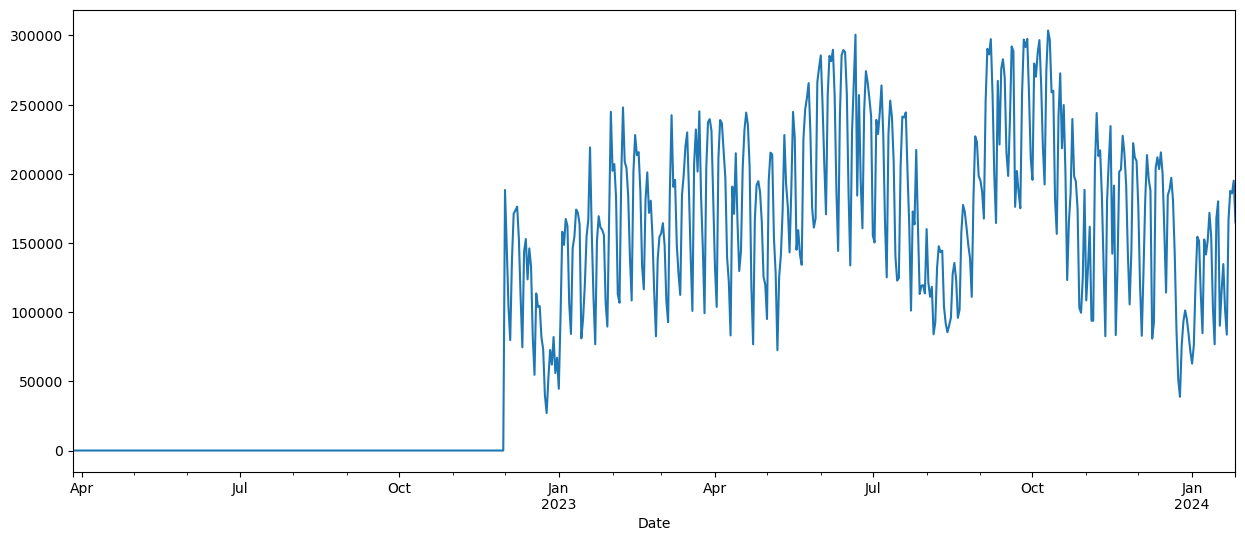

In [115]:
df = df.sort_index(ascending=True)

fig = plt.figure(figsize=(15, 6))
df["sum_counts"].plot(kind="line")

In [116]:
split_date ='2022-12-01'
df = df.loc[df.index > split_date]

---

### Time series decomposition

One of the most common analysis for time series is decomposing it into multiple parts. The parts we can divide a time series into are: __trend__, __seasonality__ and __noise__.

This 3 parts can combine either additively or multiplicatively into the time series.

##### <span style="color:gray;"> Additive Model </span>
<center> y(t) = Trend + Seasonality + Noise </center>

Additives models are linear. Trend is linear and seasonality has constant frequency and amplitude. Change is constant over time.

##### <span style="color:gray;"> Multiplicative model </span>
<center> y(t) = Trend * Seasonality * Noise </center>

Multiplicatives models are nonlinear, trend is curved and seasonality is not constant. Change is not constant over time.


#### Automatic time series decomposition

Decomposing is used to analyse the time series. Identify each one of the different parts of the time series and its behaviour, each of the components may affect models in different ways. 

In [117]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df, model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, axes = plt.subplots(4,1, figsize=(15,10))

axes[0].plot(df, label='Original')
axes[0].legend(loc='upper left');
axes[1].plot(trend, label='Trend')
axes[1].legend(loc='upper left');
axes[2].plot(seasonal, label='Seasonality')
axes[2].legend(loc='upper left');
axes[3].plot(residual, label='Residual')
axes[3].legend(loc='upper left');

plt.tight_layout()

The decomposition of the time series shows :

* Trend: Overall movement of the series over the long term.
* Seasonality: Recurring patterns at regular intervals.
* Residual: Her, residual represent the effect of irregularities and random noise not captured by the decomposition model.

---

#### Smoothing to detect trends

Smoothing is taking rolling averages over windows of time. In other words, __we take the average of ‘k’ consecutive values__ depending on the frequency of time series. 

Here we can take the average over the past 1 week, i.e. last 7 values.

In [118]:
df_s = df.rolling(7).mean()
df_s.head(8)

sum_counts
Date                     
2022-12-02            NaN
2022-12-03            NaN
2022-12-04            NaN
2022-12-05            NaN
2022-12-06            NaN
2022-12-07            NaN
2022-12-08  141427.428571
2022-12-09  142194.428571

In [119]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
plt.plot(df, label="Original")
plt.plot(df_s, label="Smoothed", color="Red")
plt.plot(trend, label="Trend", color="Green")
plt.legend();

The blue, red and green lines show actual data, the 7 days average and the main trend in bicycle use over time, respectively. The red line shows the trend without the daily variations.

---

##### <span style="color:gray;"> Seasonality </span>

Seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors.

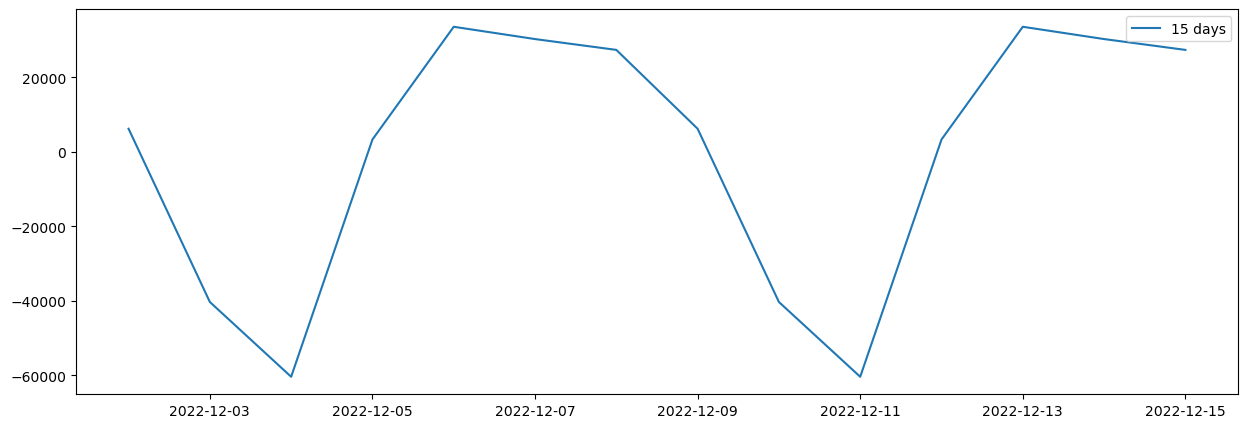

In [120]:
fig, ax = plt.subplots(1,1,figsize=(15, 5))
plt.plot(seasonal[:14], label="15 days");
plt.legend();

We can see that the seasonal component of the time series varies repeatedly over a 15 days period. This suggests that the observed behavior is influenced by events that occur at regular intervals every two weeks.

---

### Check for sationarity

__Stationarity__ is an important characteristic of time series. A time series is stationarity if it has __constant mean and variance__ over time. Most statistical models work only with stationary data as this makes it easier to model.

Often, stock prices are not a stationary process, since we might see a growing trend, or its volatility might increase over time (meaning that variance is changing).

#### Dickey-Fuller test

In [121]:
from statsmodels.tsa.stattools import adfuller
print("pvalue of the test: ", adfuller(df)[1])

pvalue of the test:  0.02994974458590025


The p-value of the test is 0.02, which is below the 0.05 threshold. This suggests that the time series is stationary, meaning that the series mean and variance do not change significantly over time.

---

#### Autocorrelation and Partial autocorrelation plots

Autocorelation plots show how correlated are values at time t with the previous values in time t-1,t-2,..t-n. 

In non-stationary series the autocorrelation values will be highly correlated with distant points in time showing possible seasonalities or trends.

In stationary series autocorrelation values will quickly decrease over time t. This shows us that no information is carried over time and then the series should be constant over time.

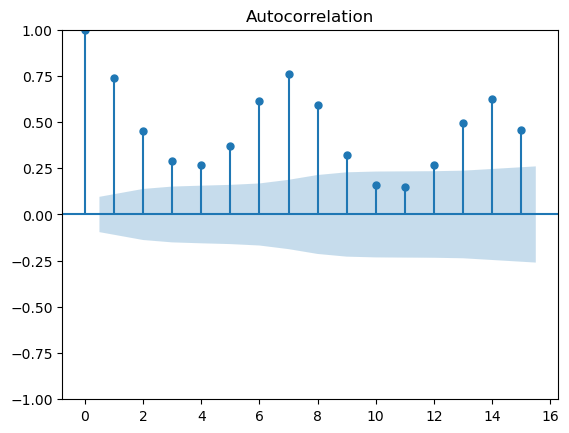

In [122]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(df, lags = 15)
plot_pacf(df, lags = 15)
plt.show()

The graphs show a trend and seasonality in the time series data, with past effects having an influence on future values.

---

#### Rolling means and standard deviation of our series

We were talking about how our mean and standard deviation should be constant over time in order to have a stationary time series.

In [123]:
# Determing rolling statistics
rolmean = df.sum_counts.rolling(window=12).mean()
rolstd = df.sum_counts.rolling(window=12).std()

# Plot rolling statistics
orig = plt.plot(df.sum_counts,label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

We can see how our mean and standar deviation are changing over the weeks.

---

### Making time series stationary

#### Difference transform to remove trend

Applying a difference transform to a time series could help remove the series dependence on time.

This transform is done by substracting the previous obesvation to the current one.

In [124]:
df_lag_1 = df - df.shift(1) 
df_lag_1.head(5)

sum_counts
Date                  
2022-12-02         NaN
2022-12-03    -43685.0
2022-12-04    -24082.0
2022-12-05     57848.0
2022-12-06     33614.0

Taking the difference between consecutive observations would be a lag-1 difference, we can tweek this lag value to fit our series.

In [125]:
df_lag_3 = df - df.shift(3)
df_lag_3.head(5)

sum_counts
Date                  
2022-12-02         NaN
2022-12-03         NaN
2022-12-04         NaN
2022-12-05     -9919.0
2022-12-06     67380.0

In [126]:
fig, axes = plt.subplots(3,1, figsize=(10,10))

axes[0].plot(df, label='Original')
axes[0].plot(df.sum_counts.rolling(window=12).mean(), color='red', label='Rolling Mean')
axes[0].plot(df.sum_counts.rolling(window=12).std() , color='black', label = 'Rolling Std')
axes[0].legend(loc='upper left');

axes[1].plot(df_lag_1, label='Lag 1 - Difference transform')
axes[1].plot(df_lag_1.sum_counts.rolling(window=12).mean(), color='red', label='Rolling Mean')
axes[1].plot(df_lag_1.sum_counts.rolling(window=12).std() , color='black', label = 'Rolling Std')
axes[1].legend(loc='upper left');

axes[2].plot(df_lag_3, label='Lag 3 - Difference transform')
axes[2].plot(df_lag_3.sum_counts.rolling(window=12).mean(), color='red', label='Rolling Mean')
axes[2].plot(df_lag_3.sum_counts.rolling(window=12).std() , color='black', label = 'Rolling Std')
axes[2].legend(loc='upper left');

plt.tight_layout()

<div class="alert-warning">
We can also apply differencing transforms consecutively in the same series if the temporal effect has not been removed yet. This is called multiple order difference transform.
</div>

In [127]:
# Check 
print("pvalue of the test: ", adfuller(df_lag_1.dropna())[1])

pvalue of the test:  2.162532848782793e-06


#### Difference transform to remove seasonality


In [128]:
df_lag_7 = df - df.shift(7)

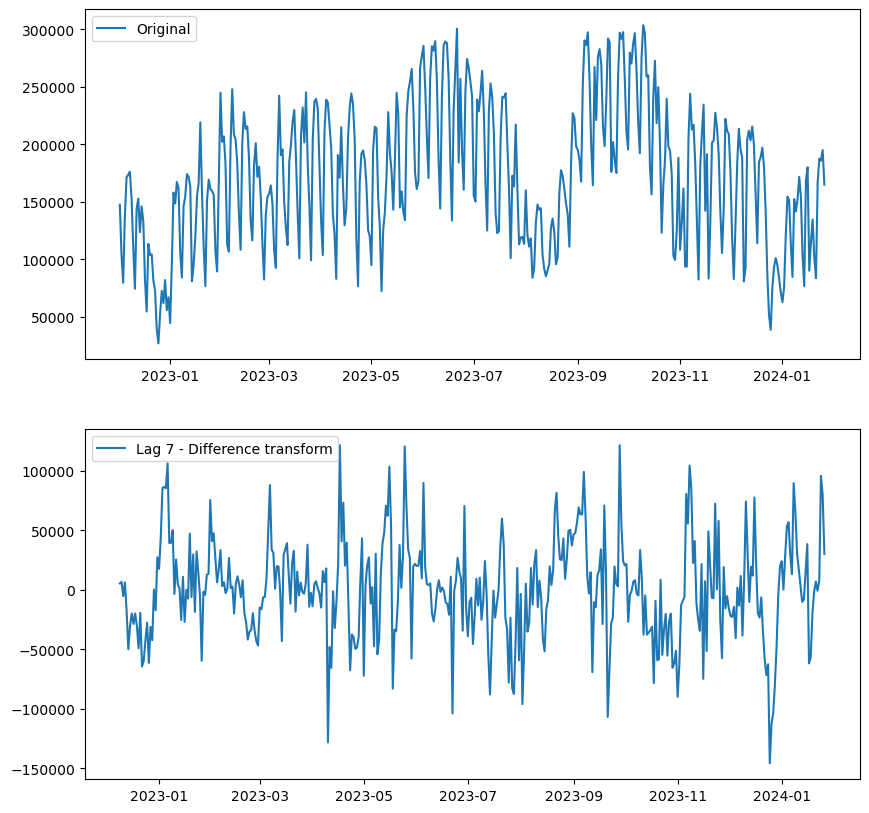

In [129]:
fig, axes = plt.subplots(2,1, figsize=(10,10))

axes[0].plot(df, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(df_lag_7, label='Lag 7 - Difference transform')
axes[1].legend(loc='upper left');

The graphs show the original bicycle demand time series and the series after applying a difference transformation with a 7-day lag. The difference transformation helps to eliminate trend and seasonality effects, making the series more stationary.

---

In [130]:
# Check 
print("pvalue of the test: ", adfuller(df_lag_7.dropna())[1])

pvalue of the test:  6.667471219584872e-05


The test indicates a low p-value, showing that non-stationarity has been reduced and the series is stationary. 

---

#### Log transform to remove variance shifts 

Applying a log scale transform to a time series could also help remove the series dependence on time.


In [131]:
df_log = np.log(df)

In [132]:
fig, axes = plt.subplots(2,1, figsize=(10,10))

axes[0].plot(df, label='Original')
axes[0].plot(df.sum_counts.rolling(window=12).mean(), color='red', label='Rolling Mean')
#axes[0].plot(df.sum_counts.rolling(window=12).std() , color='black', label = 'Rolling Std')
axes[0].legend(loc='upper left');

axes[1].plot(df_log, label='Log transform')
axes[1].plot(df_log.sum_counts.rolling(window=12).mean(), color='red', label='Rolling Mean')
#axes[1].plot(df_log.sum_counts.rolling(window=12).std() , color='black', label = 'Rolling Std')
axes[1].legend(loc='upper left');

The graphs show the effect of log transformation on the time series of bicycle count data. Log transformation reduces fluctuations and variations in the data, making it easier to visualize trends.

---

#### Put them together

We can combine these methods to make a time series stationary.

In [133]:
df_log_lag_1 = df_log - df_log.shift(1) 

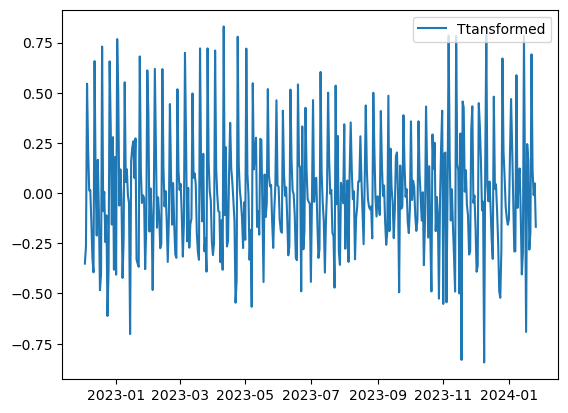

In [134]:
plt.plot(df_log_lag_1, label='Ttansformed')
plt.legend(loc='upper right');

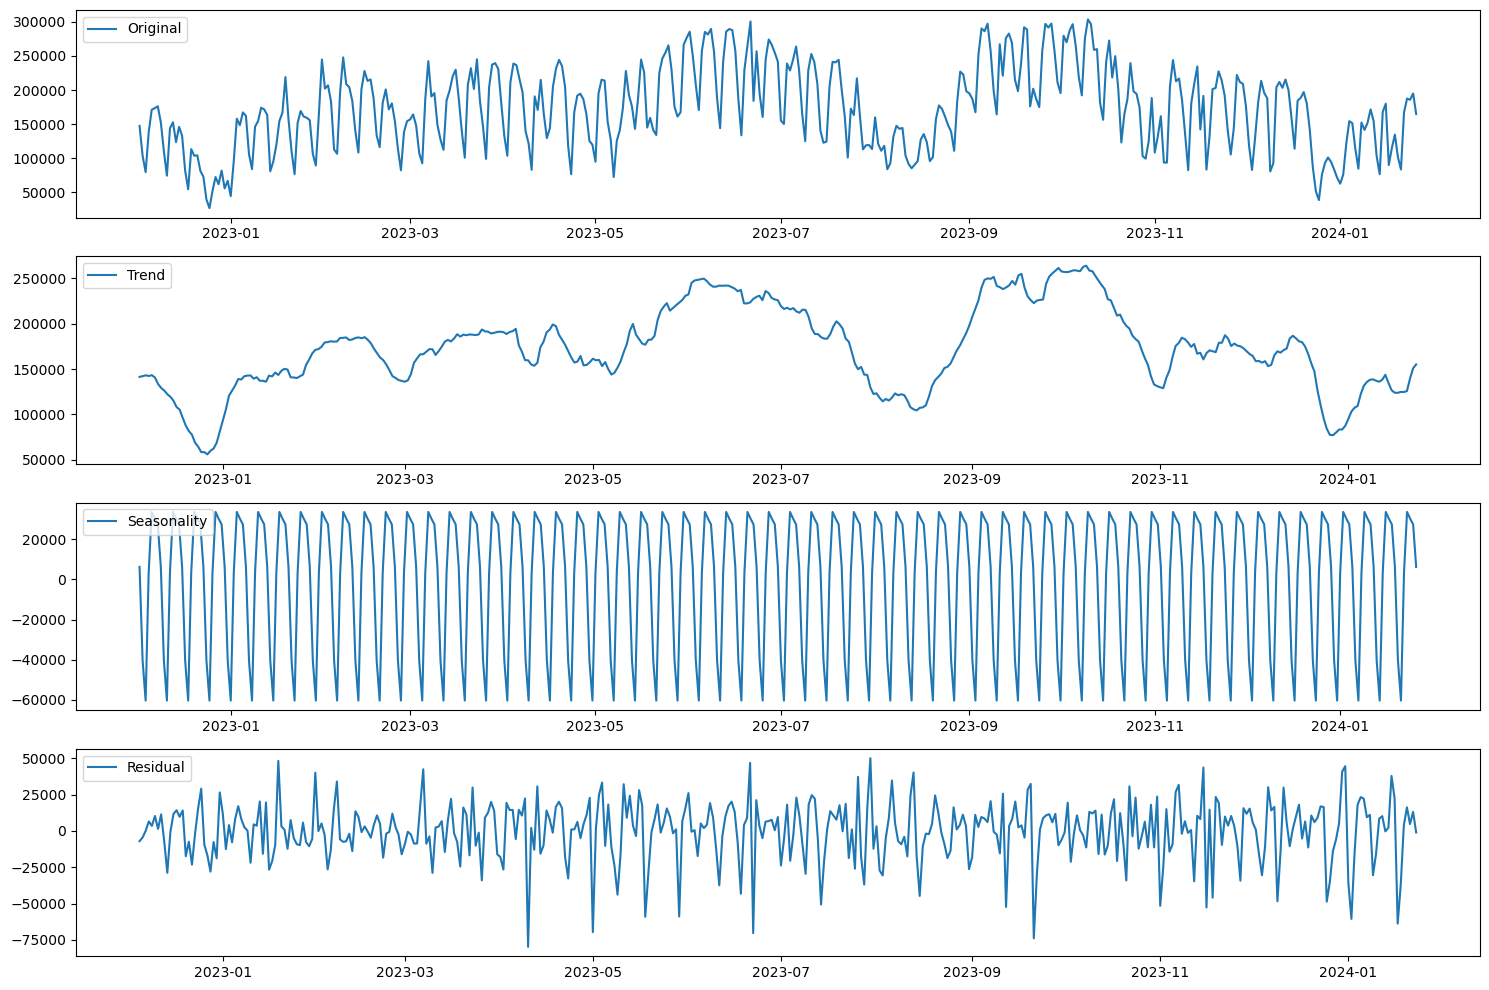

In [135]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df, model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, axes = plt.subplots(4,1, figsize=(15,10))

axes[0].plot(df, label='Original')
axes[0].legend(loc='upper left');
axes[1].plot(trend, label='Trend')
axes[1].legend(loc='upper left');
axes[2].plot(seasonal, label='Seasonality')
axes[2].legend(loc='upper left');
axes[3].plot(residual, label='Residual')
axes[3].legend(loc='upper left');

plt.tight_layout()

---

In [136]:
df_log_lag_7 = df_log - df_log.shift(7)

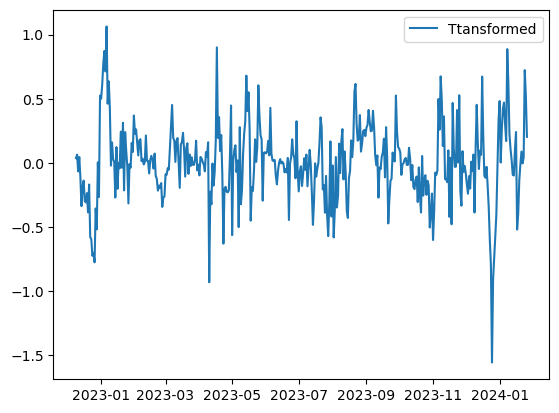

In [137]:
plt.plot(df_log_lag_7, label='Ttansformed')
plt.legend(loc='upper right');

---

In [138]:
df_log_ma = df_log.rolling(window=12).mean()
df_log_shift = df_log - df_log_ma

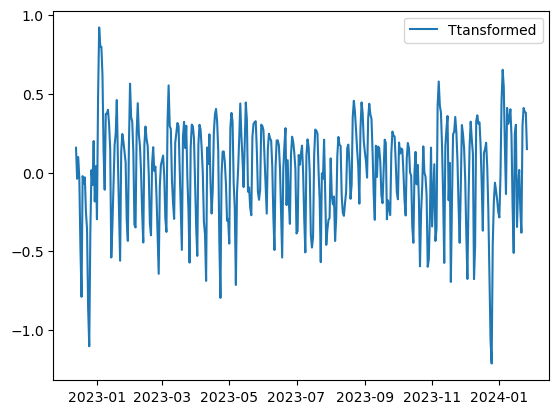

In [139]:
plt.plot(df_log_shift, label='Ttansformed')
plt.legend(loc='upper right');

In [140]:
# Check 
print("pvalue of the test: ", adfuller(df_log_shift.dropna())[1])

pvalue of the test:  1.9445581707442662e-07


---

# VIII. Time Series Forecasting | Statistical Models

---

We're going to apply various statistical models to forecast a time series.

---

### Prepare for time series

In [141]:
df.head()

sum_counts
Date                  
2022-12-02      147566
2022-12-03      103881
2022-12-04       79799
2022-12-05      137647
2022-12-06      171261

#### Making time series stationary

In [142]:
df_log = np.log(df)
dfs = df_log - df_log.shift(1) 
dfs.dropna(inplace=True)

df_old = df.copy()
df = dfs
df.head()

sum_counts
Date                  
2022-12-03   -0.351030
2022-12-04   -0.263735
2022-12-05    0.545181
2022-12-06    0.218496
2022-12-07    0.013444

#### Autocorrelation and Partial autocorrelation plots

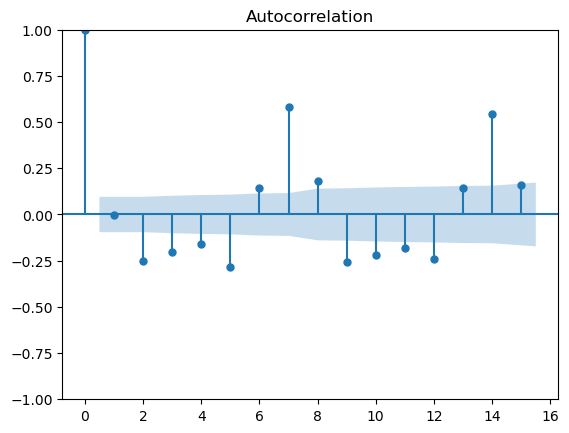

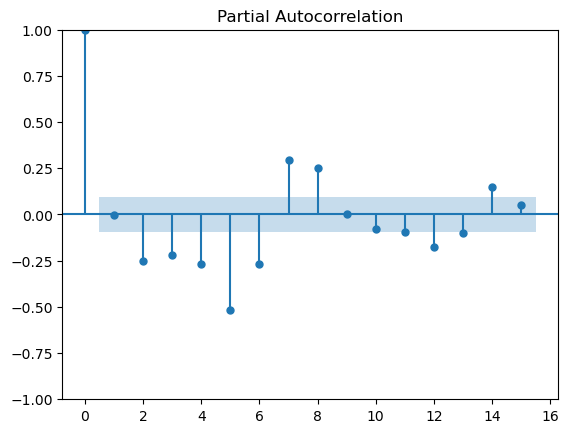

In [143]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(df, lags = 15)
plot_pacf(df, lags = 15)
plt.show()

### Time series forecasting

There are many methods that we can use for time series forecasting.

#### Split dataset to be able to evaluate the models

In [144]:
split_date ='2023-11-01'
df_train = df.loc[df.index < split_date]
df_test = df.loc[df.index >= split_date]
print(f"{len(df_train)} months of training data and {len(df_test)} months of testing data ")

333 months of training data and 87 months of testing data 


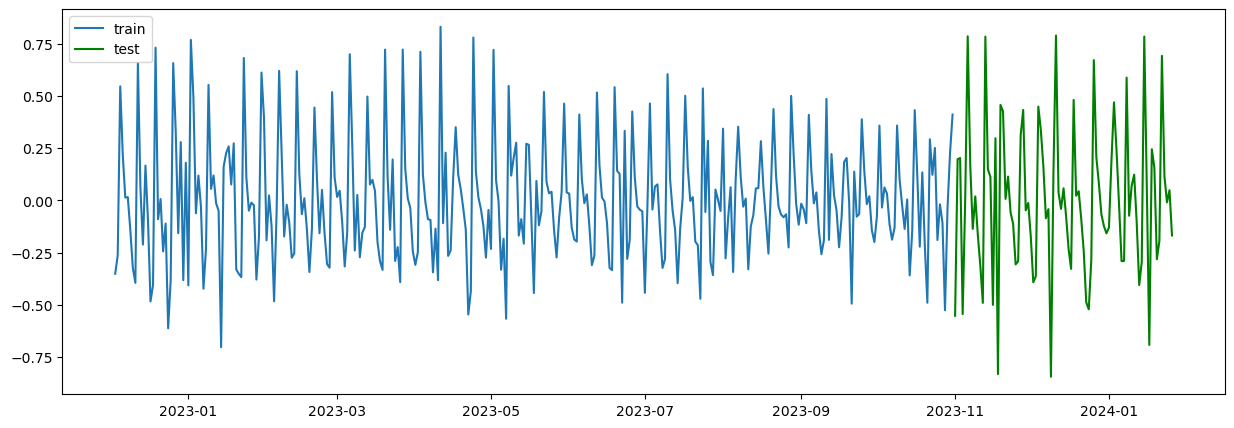

In [145]:
fig, ax = plt.subplots(1,1,figsize=(15, 5))
plt.plot(df_train, label="train");
plt.plot(df_test, label="test", color="green");
plt.legend();

---

### <span style="color:steelblue;"> Naive forecast </span>

In [146]:
df_mean = df_train.sum_counts.mean()
mean_forecast = np.array([df_mean for v in range(len(df_test))])
mean_forecast_df = pd.DataFrame(data=mean_forecast, columns=df_test.columns, index=df_test.index)

In [147]:
def plot_forecast(forecast_df,method_name):
    fig, ax = plt.subplots(1,1,figsize=(15, 5))
    plt.plot(df_train, label="train");
    plt.plot(df_test, label="test", color="green");
    plt.plot(forecast_df, label=method_name, color="red", linestyle=":");
    plt.legend();

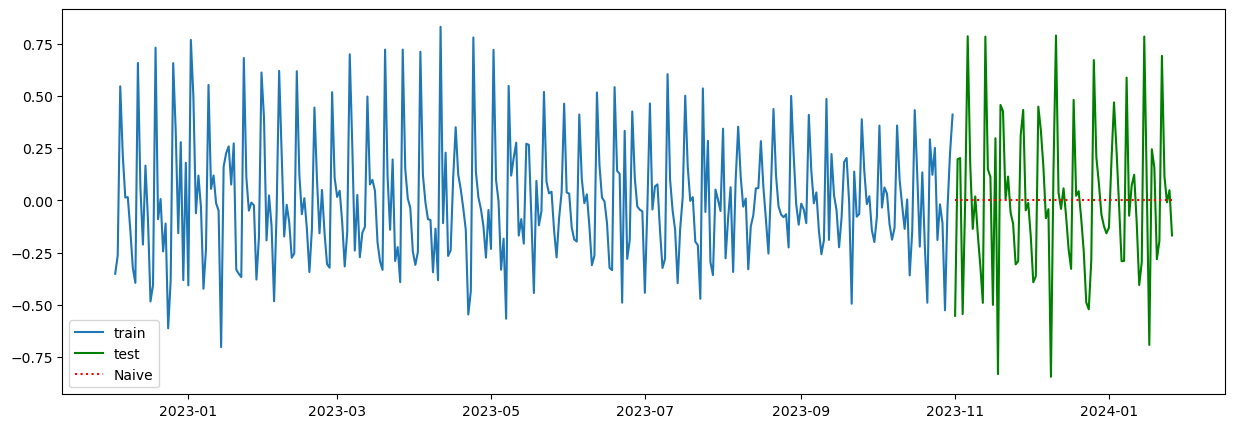

In [148]:
plot_forecast(mean_forecast_df, "Naive")

The graph shows a naive prediction where the predicted value for the entire test period is the average of the training data.

---

### Forecast quality scoring metrics

__Mean Squared Error (MSE)__, most commonly used, gives higher penalty to big mistakes and vise versa, [0, +inf).

__Mean Absolute Error (MAE)__, it is an interpretable metric because it has the same unit of measurement as the initial series, [0, +inf).

__Mean Absolute Percentage Error (MAPE)__, same as MAE but percentage, — very convenient when we want to explain the quality of the model, [0, +inf).

__R squared ($R^2$)__, coefficient of determination (it can be interpreted as a percentage of variance explained by the model), (-inf, 1].

In [149]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [150]:
results_all_models = pd.DataFrame(columns=["MSE","MAE","MAPE","R2"])

def evaluate_forecast(df_test, df_pred, method_name):
    y = df_test.values
    y_pred = df_pred.values
    results = {}
    results['MSE'] = mean_squared_error(y, y_pred)
    results['MAE'] = mean_absolute_error(y, y_pred)
    results['MAPE'] = mean_absolute_percentage_error(y, y_pred)
    results['R2'] = r2_score(y, y_pred)
    
    results_df = pd.DataFrame(data=results, index=[method_name])
    global results_all_models
    results_all_models = pd.concat([results_all_models,results_df])
    print( results_all_models.head(10) )

In [151]:
evaluate_forecast(df_test, mean_forecast_df, "Naive")

            MSE       MAE      MAPE        R2
Naive  0.124628  0.271041  1.008385 -0.000041


The naive forecasting method, based on the mean of the data, does not offer accurate predictions for this time series. We will test other methods.

---

### <span style="color:steelblue;"> Autoregression (AR) </span>

The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps. 

Parameters of the model:

- __Number of AR (Auto-Regressive) terms (p):__ p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be based on x(t-1)….x(t-5).


In [152]:
from statsmodels.tsa.arima.model import ARIMA

pred_ = list()
for t in range(len(df_test.sum_counts)):
    temp_train = df[:len(df_train)+t]
    model = ARIMA(temp_train.sum_counts, order=(1, 0, 0))
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train), dynamic=False)
    pred_ = pred_ + [predictions]
    
ar_forecast_df = pd.concat(pred_)

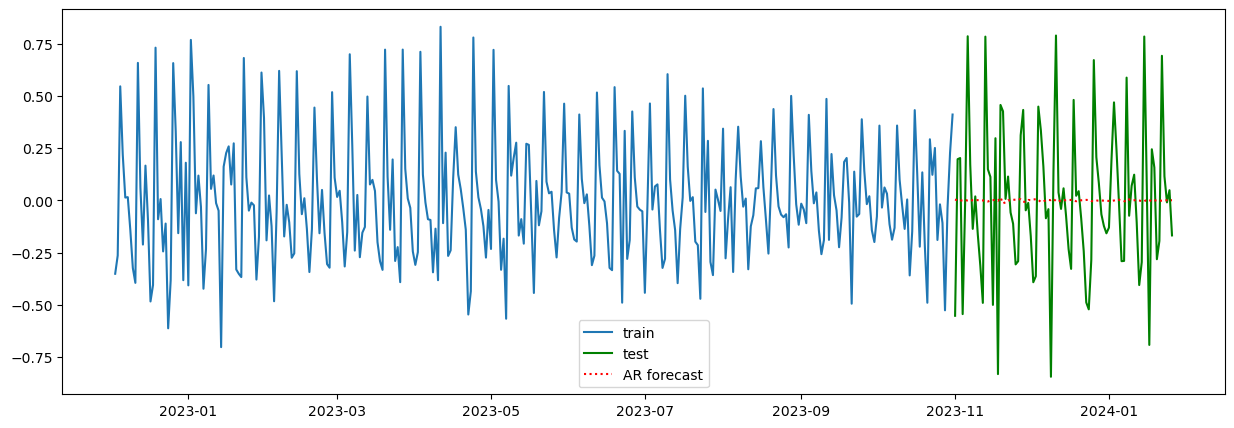

In [153]:
plot_forecast(ar_forecast_df, "AR forecast")

In [154]:
evaluate_forecast(df_test, ar_forecast_df, "AR")

            MSE       MAE      MAPE        R2
Naive  0.124628  0.271041  1.008385 -0.000041
AR     0.125382  0.272010  1.043088 -0.006087


### <span style="color:steelblue;"> Moving Average (MA) </span>

The Moving Average (MA) method models the next step in the sequence as the average of a window of observations at prior time steps. 

Parameters of the model:

- __Number of MA (Moving Average) terms (q):__ q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be based on e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value. 


In [155]:
from statsmodels.tsa.arima.model import ARIMA

pred_ = list()
for t in range(len(df_test.sum_counts)):
    temp_train = df[:len(df_train)+t]
    model = ARIMA(temp_train.sum_counts, order=(0, 0, 1))
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train), dynamic=False)
    pred_ = pred_ + [predictions]
    
ma_forecast_df = pd.concat(pred_)

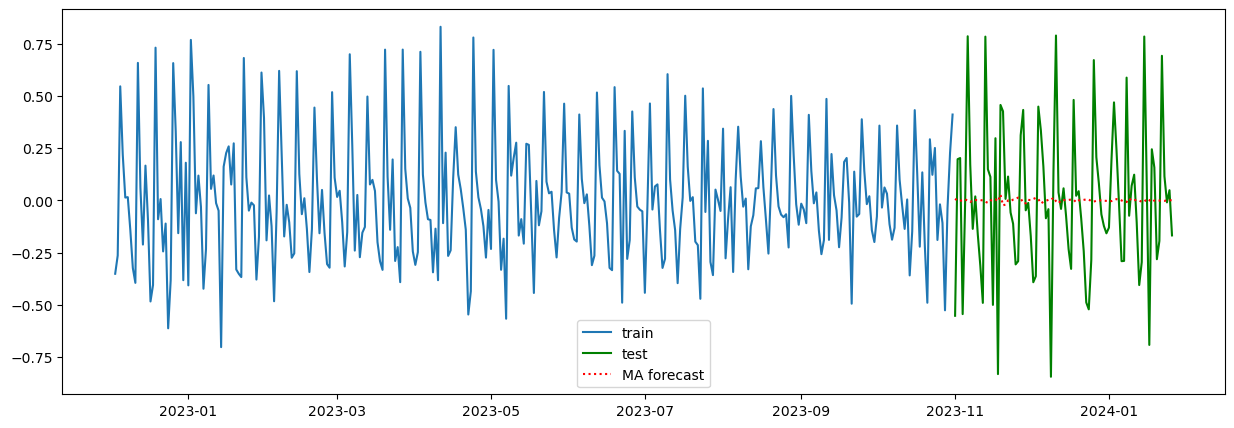

In [156]:
plot_forecast(ma_forecast_df, "MA forecast")

In [157]:
evaluate_forecast(df_test, ma_forecast_df, "MA")

            MSE       MAE      MAPE        R2
Naive  0.124628  0.271041  1.008385 -0.000041
AR     0.125382  0.272010  1.043088 -0.006087
MA     0.125733  0.272629  1.096684 -0.008905


### <span style="color:steelblue;"> Autoregressive Moving Average (ARMA) </span>

This method will basically join the previous two `AR` and `MA`. Model parameters will be the sum of the two.

Parameters of the model:

- __Number of AR (Auto-Regressive) terms (p)__ 
- __Number of MA (Moving Average) terms (q)__ 

In [158]:
from statsmodels.tsa.arima.model import ARIMA

pred_ = list()
for t in range(len(df_test.sum_counts)):
    temp_train = df[:len(df_train)+t]
    model = ARIMA(temp_train.sum_counts, order=(1, 0, 1))
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train), dynamic=False)
    pred_ = pred_ + [predictions]
    
arma_forecast_df = pd.concat(pred_)

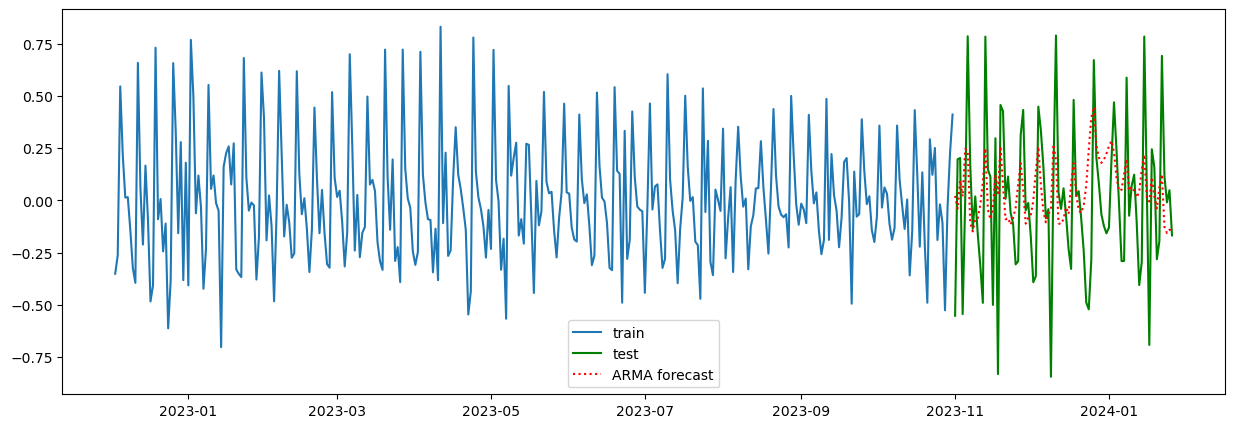

In [159]:
plot_forecast(arma_forecast_df, "ARMA forecast")

In [160]:
evaluate_forecast(df_test, arma_forecast_df, "ARMA")

            MSE       MAE      MAPE        R2
Naive  0.124628  0.271041  1.008385 -0.000041
AR     0.125382  0.272010  1.043088 -0.006087
MA     0.125733  0.272629  1.096684 -0.008905
ARMA   0.112054  0.264406  4.289142  0.100860


The ARMA method improved forecast accuracy over the AR and MA models, with lower MSE and MAE, as well as a positive coefficient of determination (R²). This indicates a better fit of the model to the test data.

---

### <span style="color:steelblue;">  Autoregressive integrated Moving Average (ARIMA)  </span>

In an ARIMA model there are 3 parameters that are used to help model the major aspects of a times series: seasonality, trend, and noise. 

These parameters are labeled p,d,and q:

* __Number of AR (Auto-Regressive) terms (p)__

* __Number of Differences (d):__ d is the parameter associated with the integrated part of the model, which effects the amount of differencing to apply to a time series.

* __Number of MA (Moving Average) terms (q)__

In [161]:
from statsmodels.tsa.arima.model import ARIMA

pred_ = list()
for t in range(len(df_test.sum_counts)):
    temp_train = df[:len(df_train)+t]
    model = ARIMA(temp_train.sum_counts, order=(1, 0, 1))
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train), dynamic=False)
    pred_ = pred_ + [predictions]
    
arima_forecast_df = pd.concat(pred_)

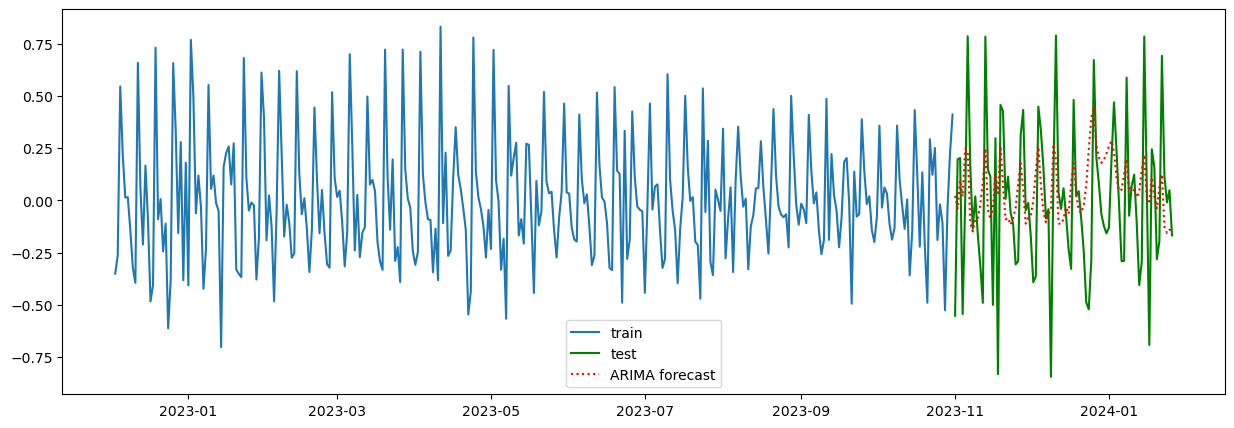

In [162]:
plot_forecast(arima_forecast_df, "ARIMA forecast")

In [163]:
evaluate_forecast(df_test, arima_forecast_df, "ARIMA")

            MSE       MAE      MAPE        R2
Naive  0.124628  0.271041  1.008385 -0.000041
AR     0.125382  0.272010  1.043088 -0.006087
MA     0.125733  0.272629  1.096684 -0.008905
ARMA   0.112054  0.264406  4.289142  0.100860
ARIMA  0.112054  0.264406  4.289142  0.100860


The results obtained with the ARIMA model are identical to those obtained with the ARMA model. 

---

### <span style="color:steelblue;">  Seasonal Autoregressive Integrated Moving-Average (SARIMA)  </span>

Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

__Trend Elements:__

There are three trend elements that require configuration. They are the same as the ARIMA model, specifically:

- p: Trend autoregression order.
- d: Trend difference order.
- q: Trend moving average order.

__Seasonal Elements:__

There are four seasonal elements that are not part of ARIMA that must be configured; they are:

- P: Seasonal autoregressive order.
- D: Seasonal difference order.
- Q: Seasonal moving average order.
- m: The number of time steps for a single seasonal period. For example, an S of 7 for daily data suggests a weakly seasonal cycle.

In [164]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

pred_ = list()
for t in range(len(df_test.sum_counts)):
    temp_train = df[:len(df_train)+t]
    model = SARIMAX(temp_train.sum_counts, order=(1, 0, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train), dynamic=False)
    pred_ = pred_ + [predictions]
    
sarima_forecast_df = pd.concat(pred_)

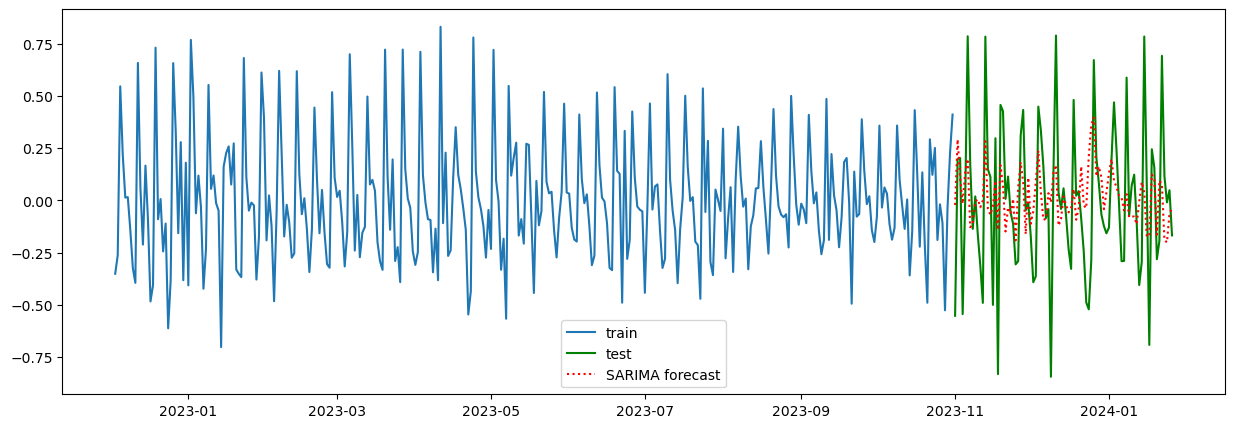

In [165]:
plot_forecast(sarima_forecast_df, "SARIMA forecast")

In [166]:
evaluate_forecast(df_test, sarima_forecast_df, "SARIMA")

             MSE       MAE      MAPE        R2
Naive   0.124628  0.271041  1.008385 -0.000041
AR      0.125382  0.272010  1.043088 -0.006087
MA      0.125733  0.272629  1.096684 -0.008905
ARMA    0.112054  0.264406  4.289142  0.100860
ARIMA   0.112054  0.264406  4.289142  0.100860
SARIMA  0.103450  0.253167  3.176559  0.169896


* The results show that the SARIMA model performs better than the previous models, with the lowest MSE, lowest MAE, and highest R², indicating that this model captures both the trend and seasonality of the data well.

* Finally, this shows that SARIMA is the most appropriate model for forecasting this time series, taking into account both the structure of the data and their seasonal patterns.

---

---